# Global Variables

In [11]:
our_alg = "RCbssEff"

# RCbssEff Scalability

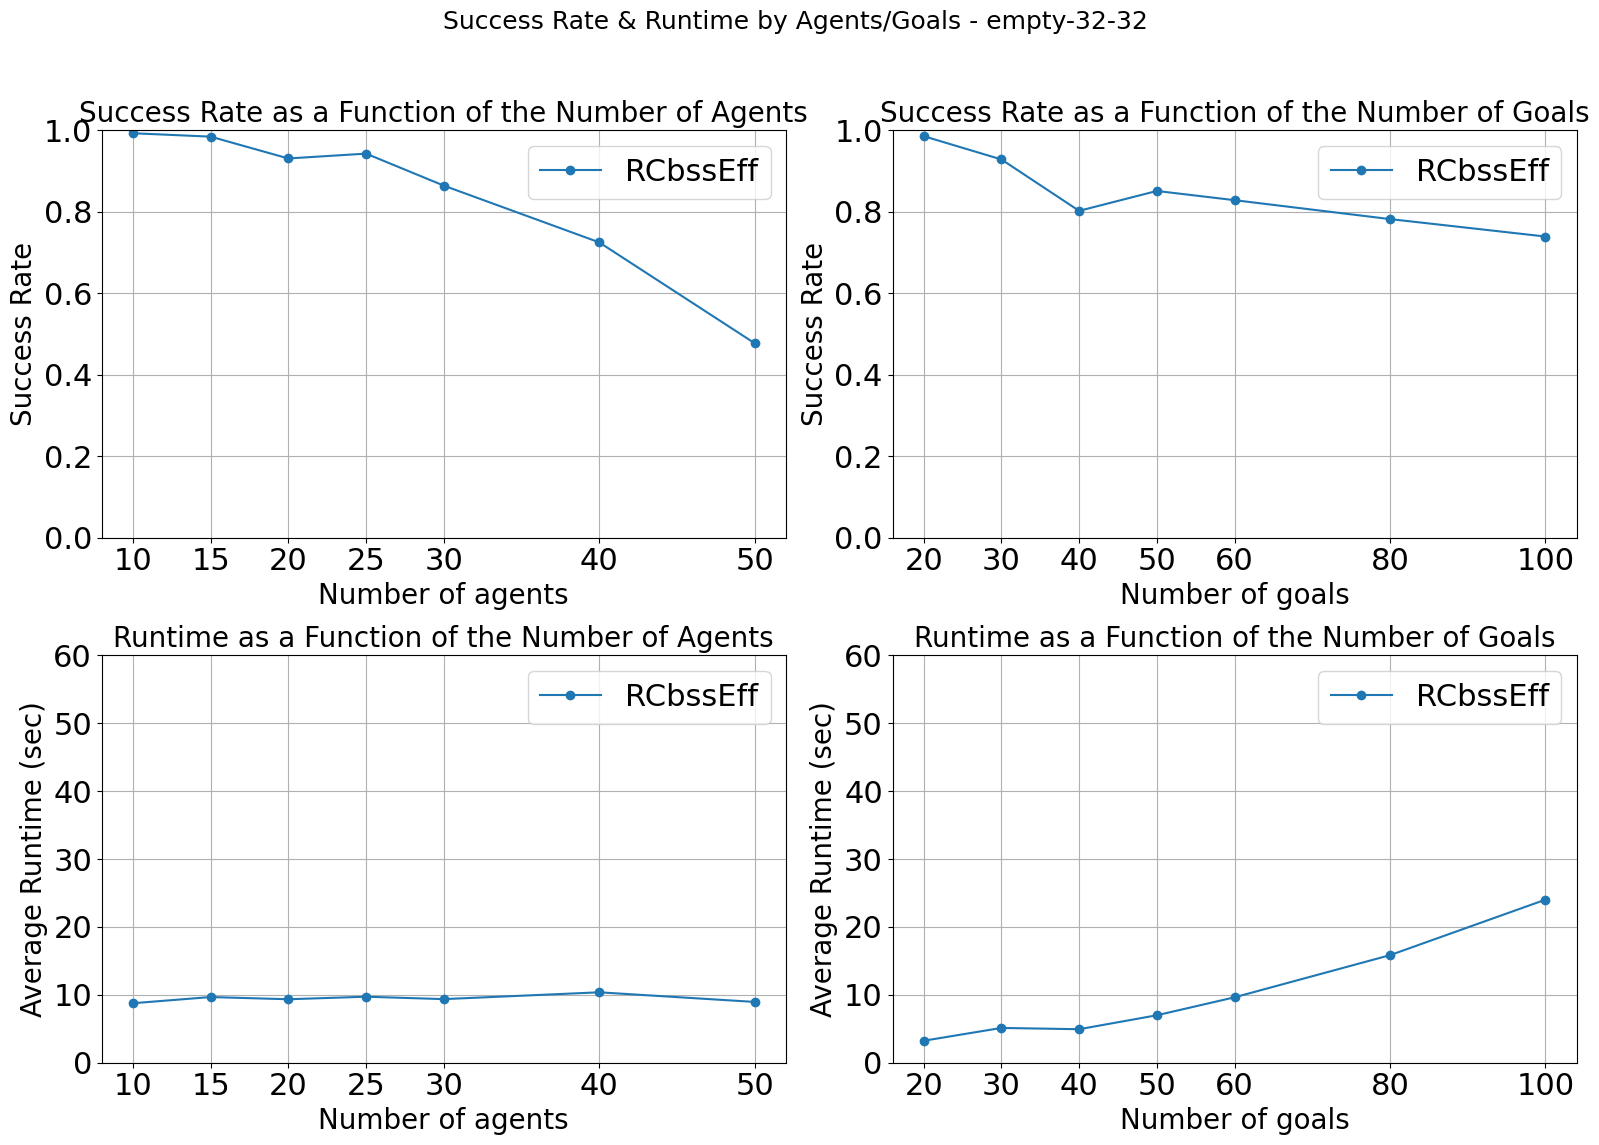

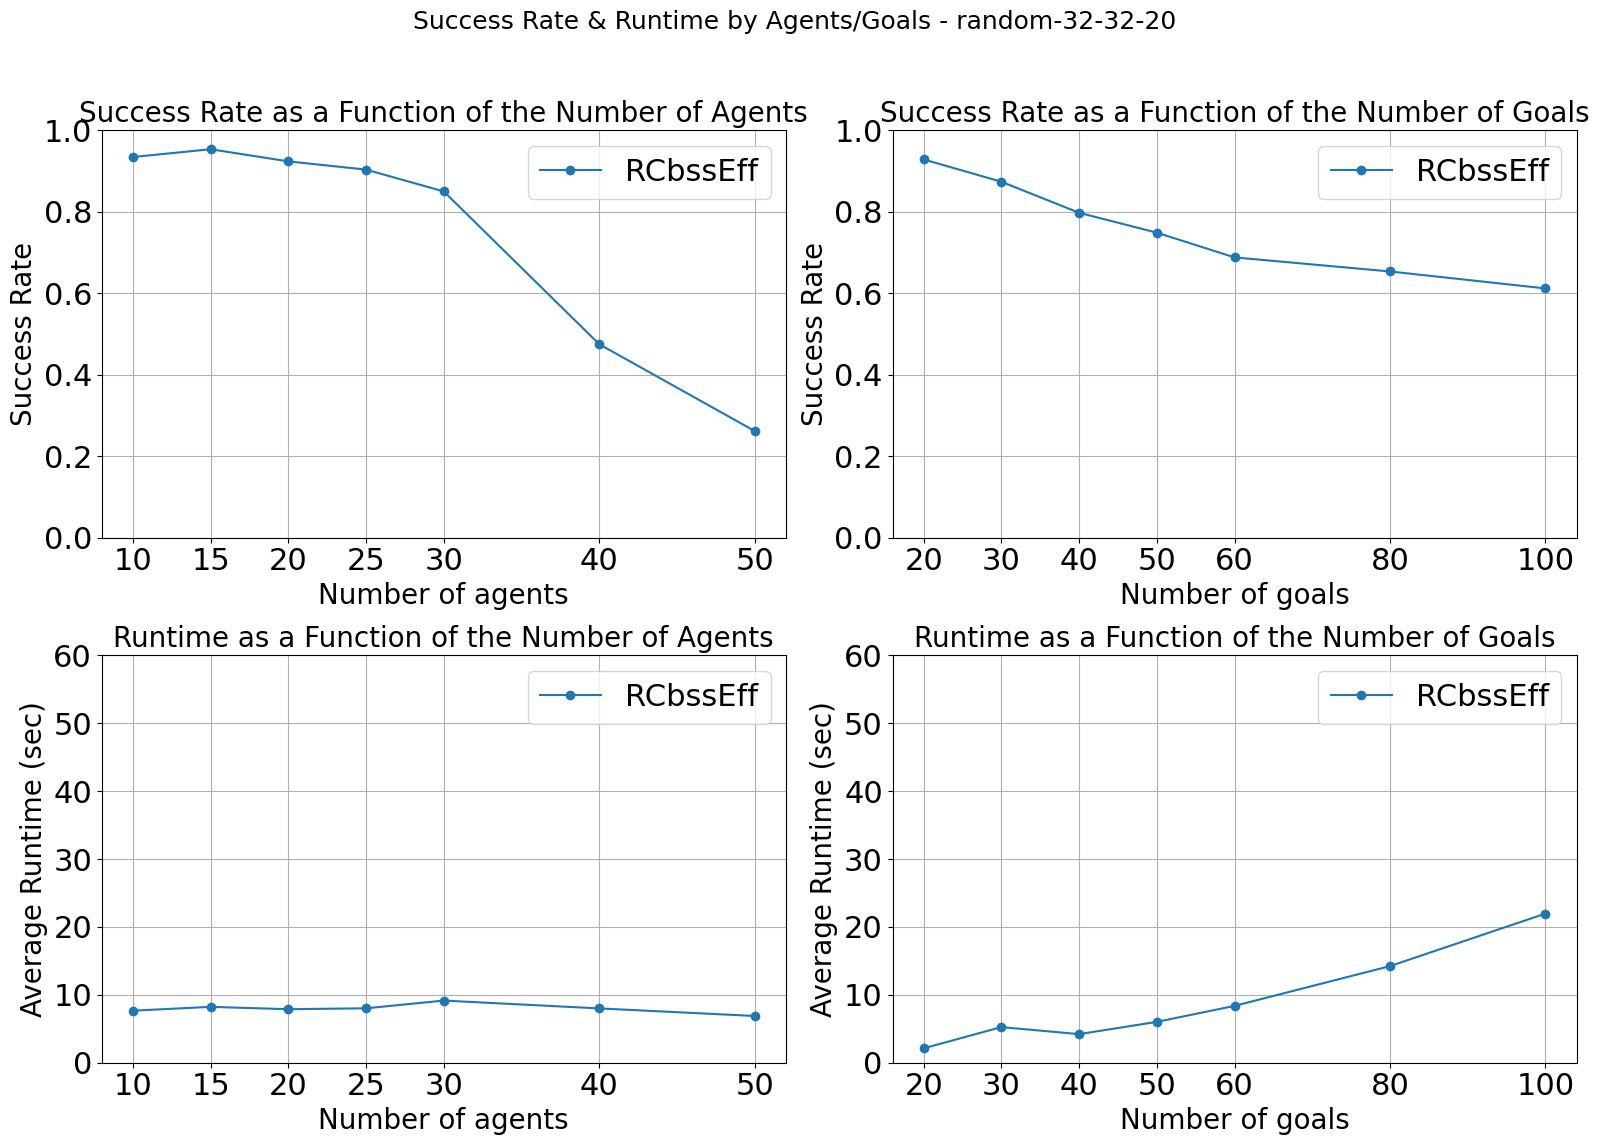

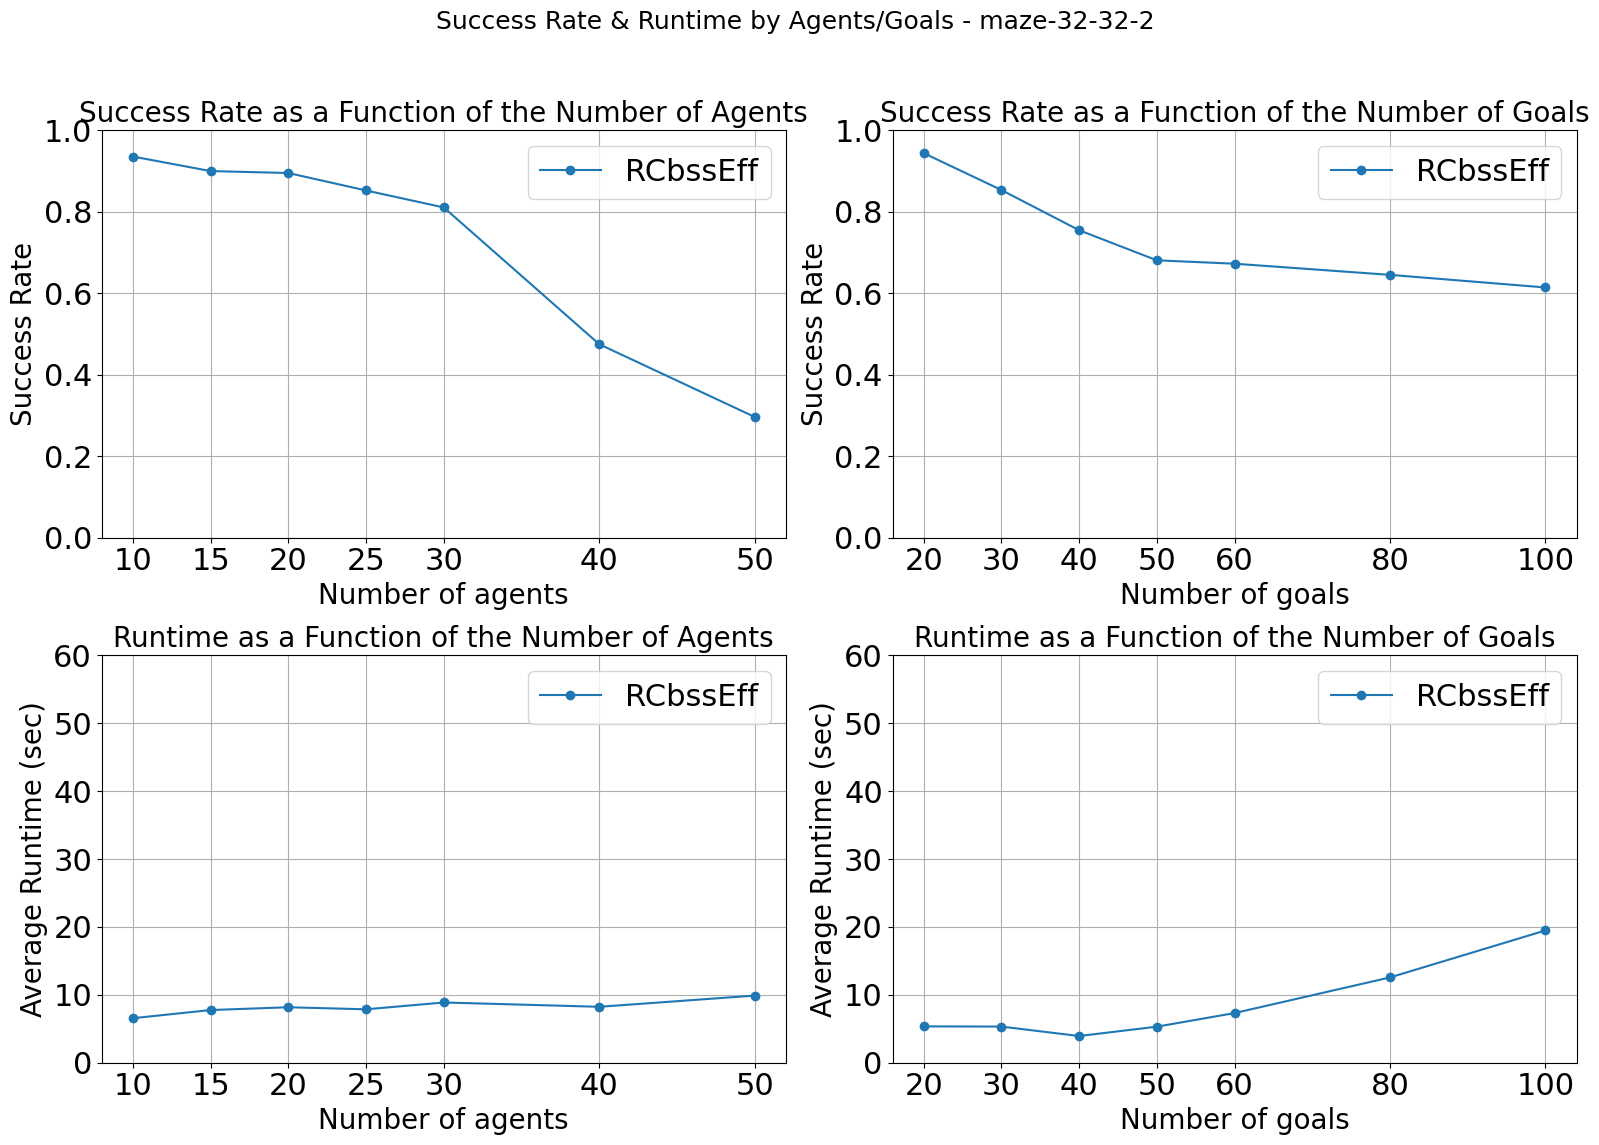

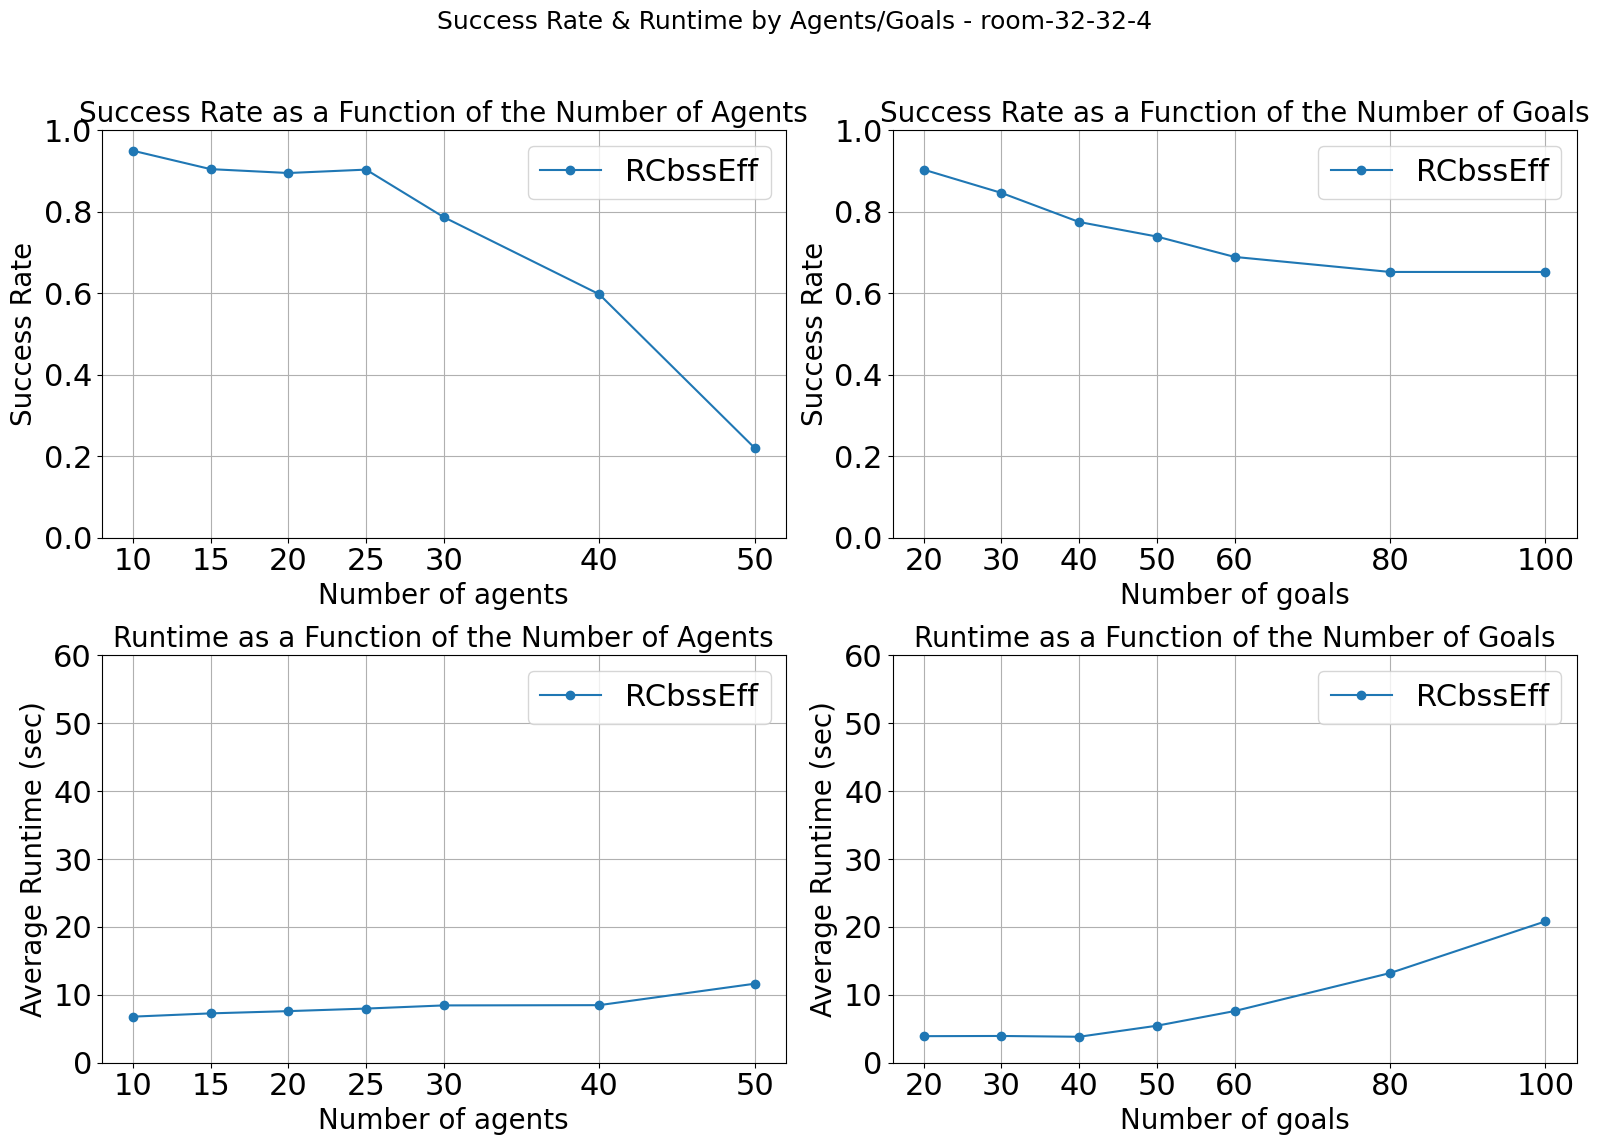

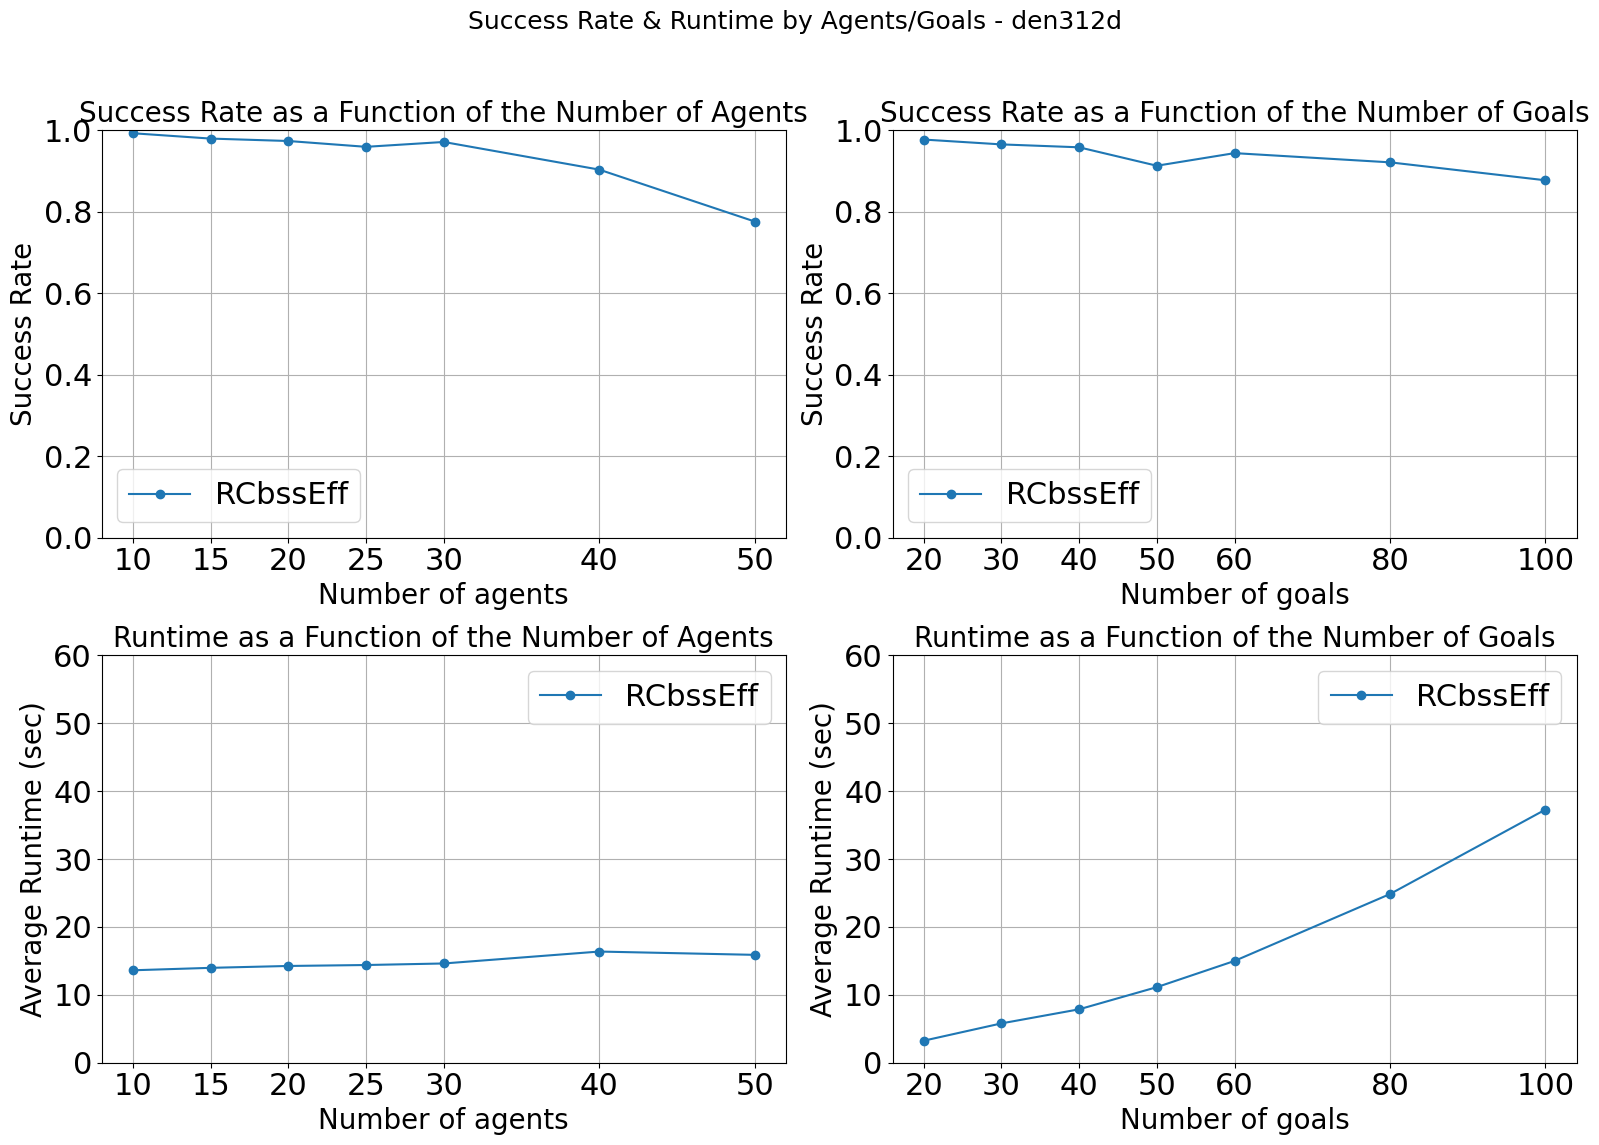

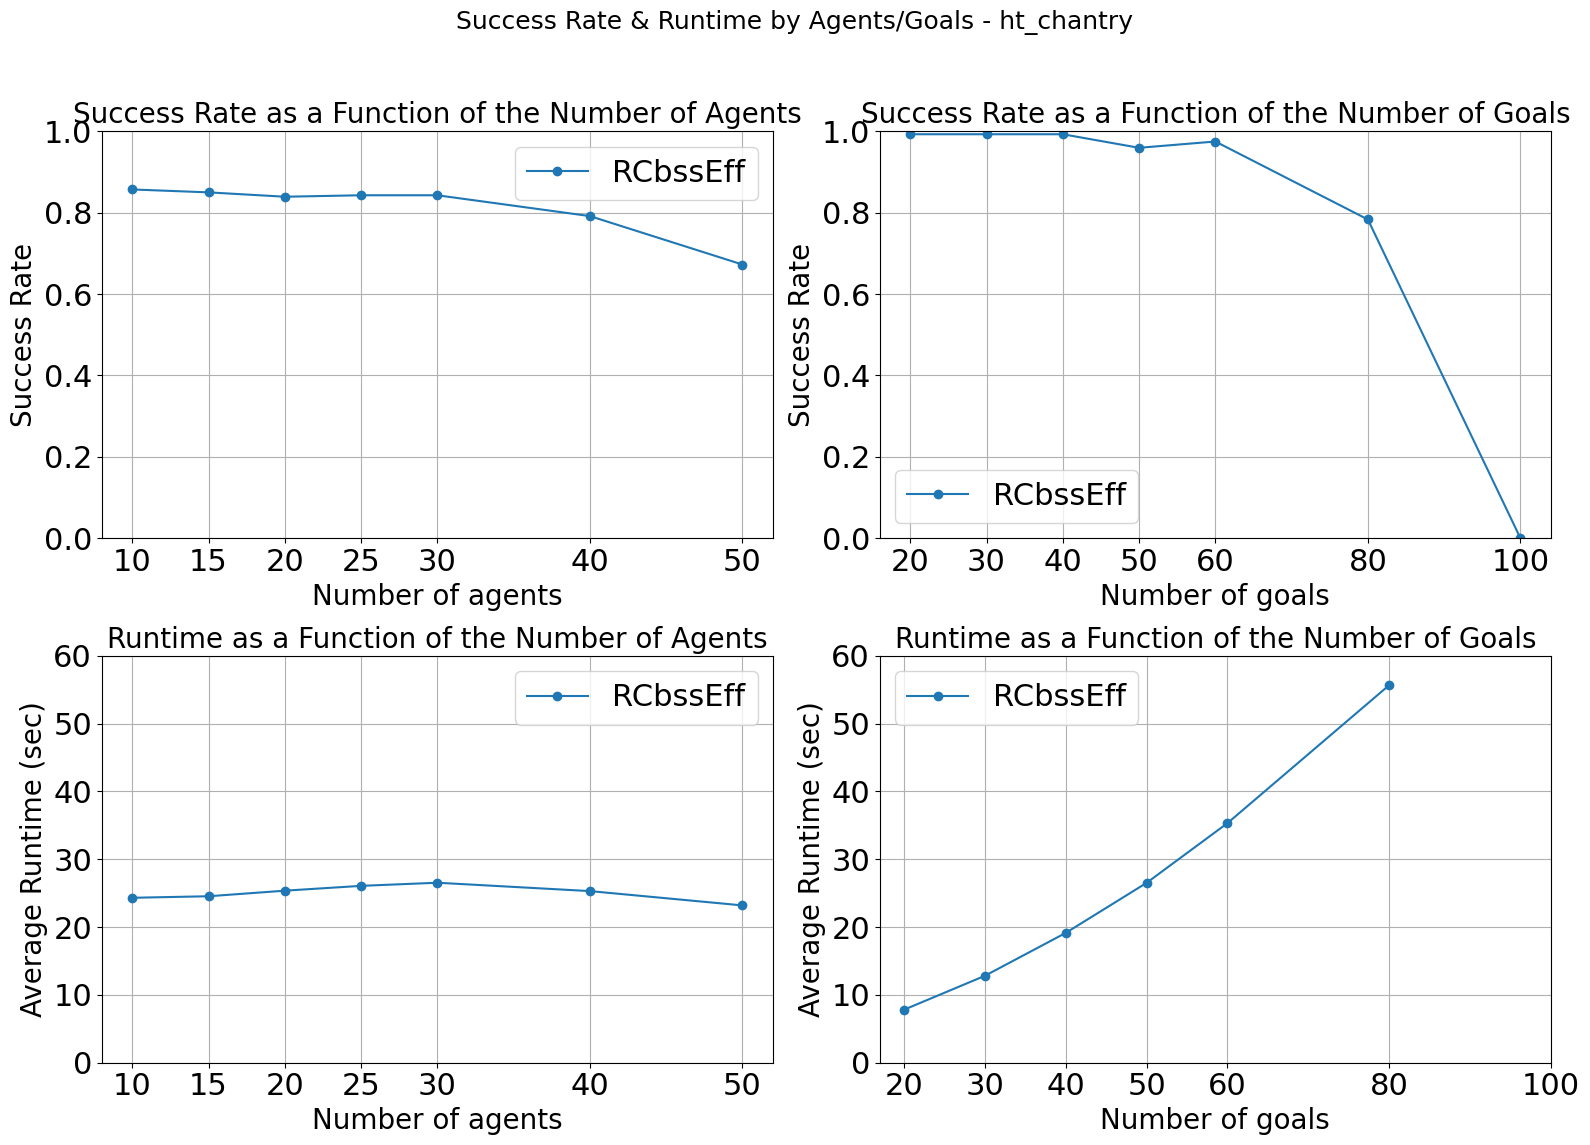

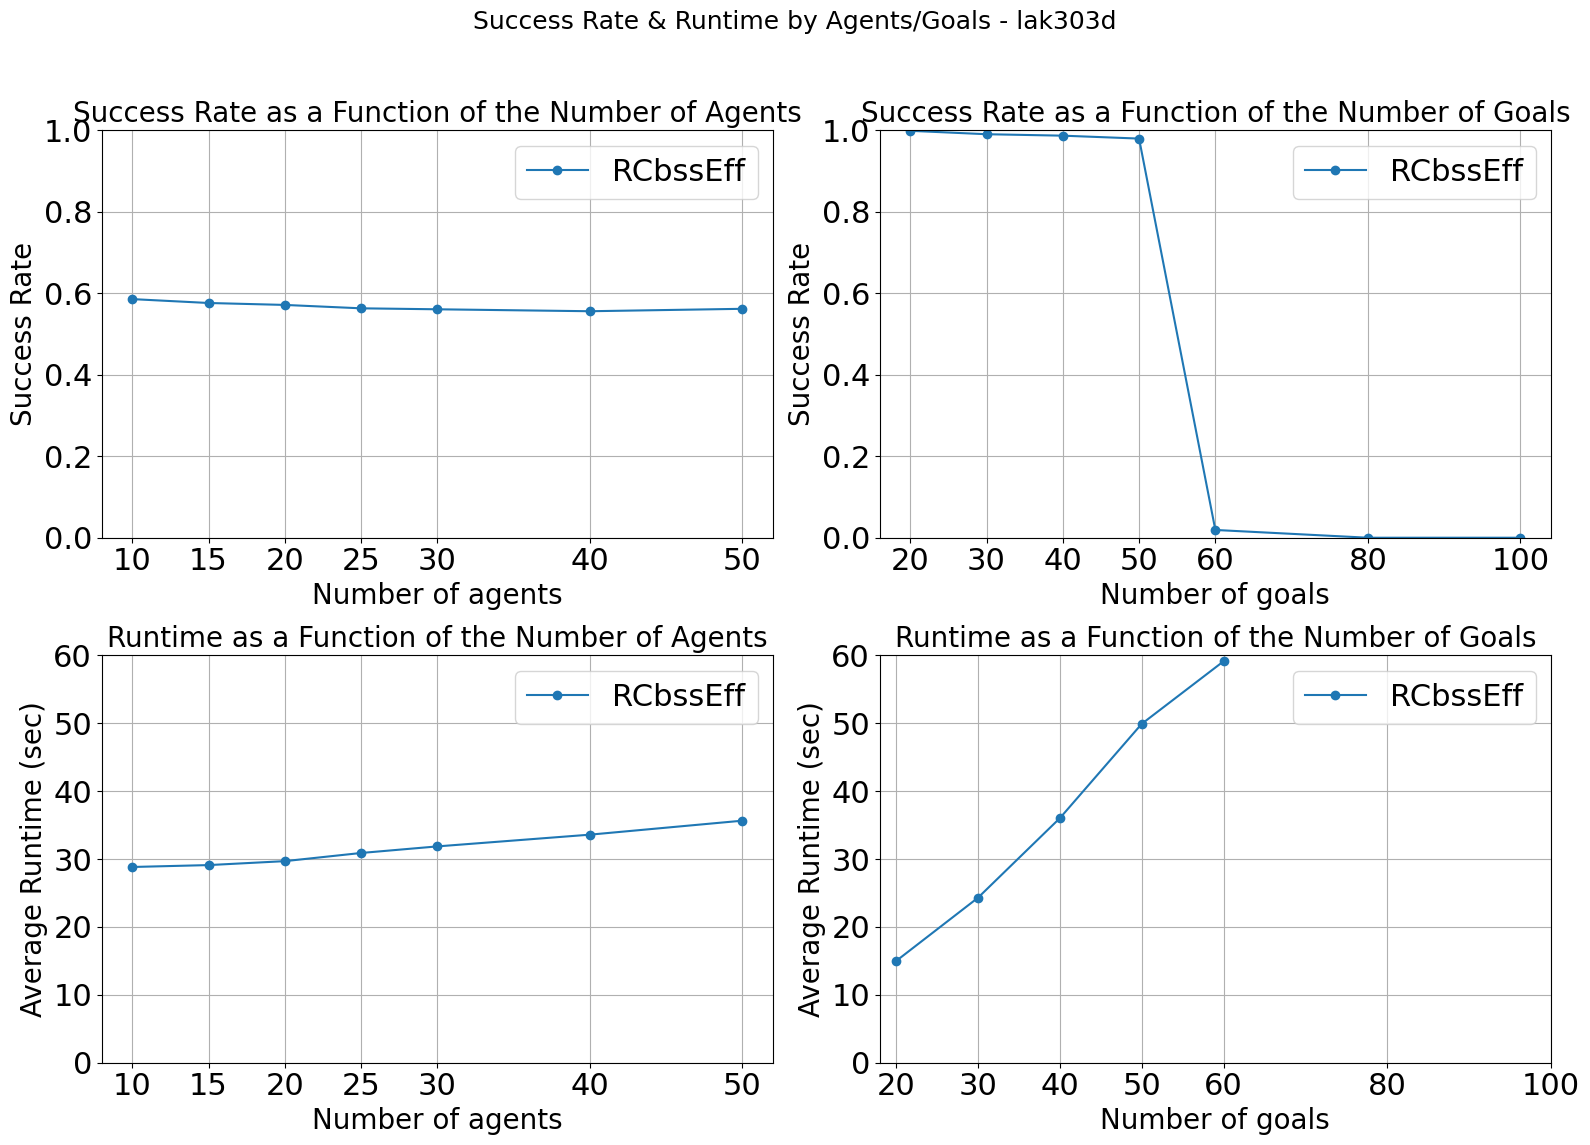

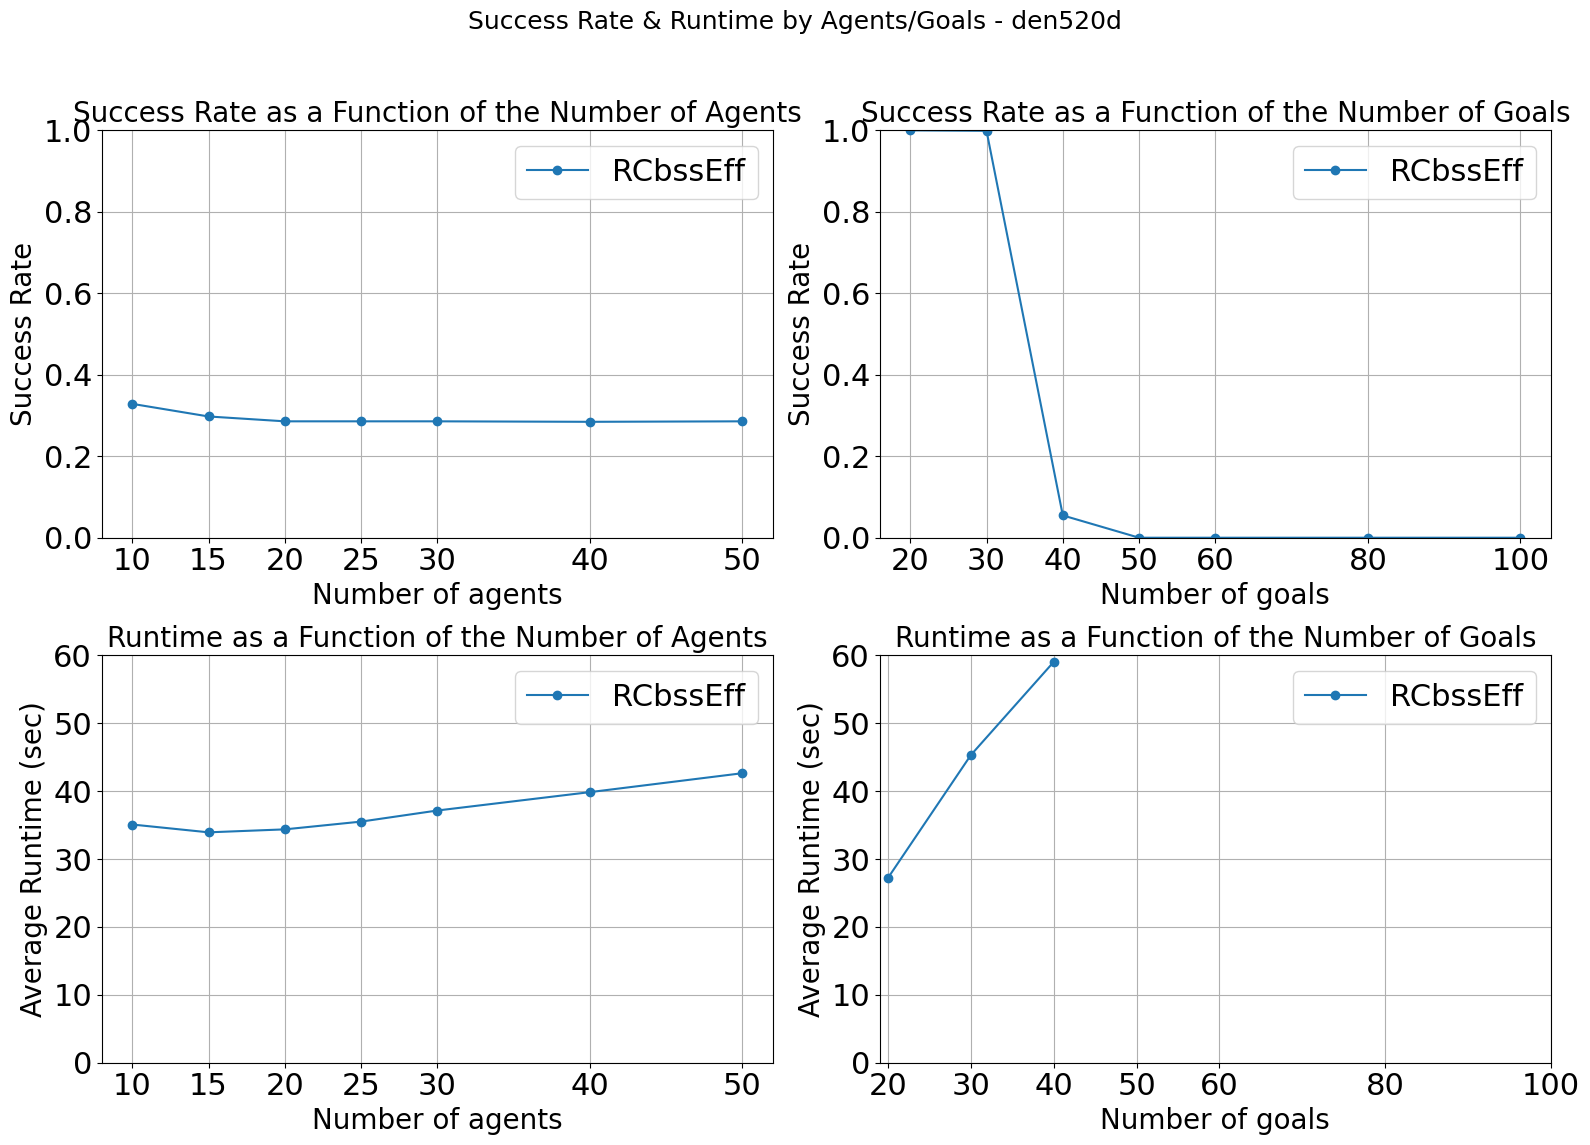

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def prepare_data():
    file_path = '/content/RCbssEffScalability_Results.csv'
    df = pd.read_csv(file_path)
    return df

def get_success_rate_data(df, x_axis):
    total_counts = df.groupby(['Map', x_axis, 'Algorithm']).size().reset_index(name='Total Count')
    valid_counts = df.dropna(how='any').groupby(['Map', x_axis, 'Algorithm']).size().reset_index(name='Valid Count')
    merged = pd.merge(total_counts, valid_counts, on=['Map', x_axis, 'Algorithm'], how='left')
    merged['Valid Count'] = merged['Valid Count'].fillna(0)
    merged['Success Rate'] = merged['Valid Count'] / merged['Total Count']
    return merged

def get_runtime_data(df, x_axis):
    grouped = df.groupby(['Map', x_axis, 'Algorithm'])['Runtime'].mean().reset_index(name='Average Runtime')
    return grouped

def plot_all_for_each_map():
    df = prepare_data()

    for map_name in df['Map'].unique():
        fig, axs = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'Success Rate & Runtime by Agents/Goals - {map_name}', fontsize=18)

        # Success Rate vs Number of agents
        sr_agents = get_success_rate_data(df, 'Number of agents')
        map_sr_agents = sr_agents[sr_agents['Map'] == map_name]
        ax = axs[0, 0]
        for algo in map_sr_agents['Algorithm'].unique():
            algo_df = map_sr_agents[map_sr_agents['Algorithm'] == algo]
            ax.plot(algo_df['Number of agents'], algo_df['Success Rate'], marker='o', label=algo)
        ax.set_title('Success Rate as a Function of the Number of Agents', fontsize=20)
        ax.set_xlabel('Number of agents', fontsize=20)
        ax.set_ylabel('Success Rate', fontsize=20)
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.2))
        ax.set_xticks(sorted(map_sr_agents['Number of agents'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=22)
        ax.grid(True)

        # Success Rate vs Number of goals
        sr_goals = get_success_rate_data(df, 'Number of goals')
        map_sr_goals = sr_goals[sr_goals['Map'] == map_name]
        ax = axs[0, 1]
        for algo in map_sr_goals['Algorithm'].unique():
            algo_df = map_sr_goals[map_sr_goals['Algorithm'] == algo]
            ax.plot(algo_df['Number of goals'], algo_df['Success Rate'], marker='o', label=algo)
        ax.set_title('Success Rate as a Function of the Number of Goals', fontsize=20)
        ax.set_xlabel('Number of goals', fontsize=20)
        ax.set_ylabel('Success Rate', fontsize=20)
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.2))
        ax.set_xticks(sorted(map_sr_goals['Number of goals'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=22)
        ax.grid(True)

        # Runtime vs Number of agents
        rt_agents = get_runtime_data(df, 'Number of agents')
        map_rt_agents = rt_agents[rt_agents['Map'] == map_name]
        ax = axs[1, 0]
        for algo in map_rt_agents['Algorithm'].unique():
            algo_df = map_rt_agents[map_rt_agents['Algorithm'] == algo]
            avg_rt = algo_df.groupby('Number of agents')['Average Runtime'].mean()
            ax.plot(avg_rt.index, avg_rt.values, marker='o', label=algo)
        ax.set_title('Runtime as a Function of the Number of Agents', fontsize=20)
        ax.set_xlabel('Number of agents', fontsize=20)
        ax.set_ylabel('Average Runtime (sec)', fontsize=20)
        ax.set_ylim(0, 60)
        ax.set_yticks(range(0, 61, 10))
        ax.set_xticks(sorted(map_rt_agents['Number of agents'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=22)
        ax.grid(True)

        # Runtime vs Number of goals
        rt_goals = get_runtime_data(df, 'Number of goals')
        map_rt_goals = rt_goals[rt_goals['Map'] == map_name]
        ax = axs[1, 1]
        for algo in map_rt_goals['Algorithm'].unique():
            algo_df = map_rt_goals[map_rt_goals['Algorithm'] == algo]
            avg_rt = algo_df.groupby('Number of goals')['Average Runtime'].mean()
            ax.plot(avg_rt.index, avg_rt.values, marker='o', label=algo)
        ax.set_title('Runtime as a Function of the Number of Goals', fontsize=20)
        ax.set_xlabel('Number of goals', fontsize=20)
        ax.set_ylabel('Average Runtime (sec)', fontsize=20)
        ax.set_ylim(0, 60)
        ax.set_yticks(range(0, 61, 10))
        ax.set_xticks(sorted(map_rt_goals['Number of goals'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=22)
        ax.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Execute the function
plot_all_for_each_map()


# RCbssEff vs. RCbssBase

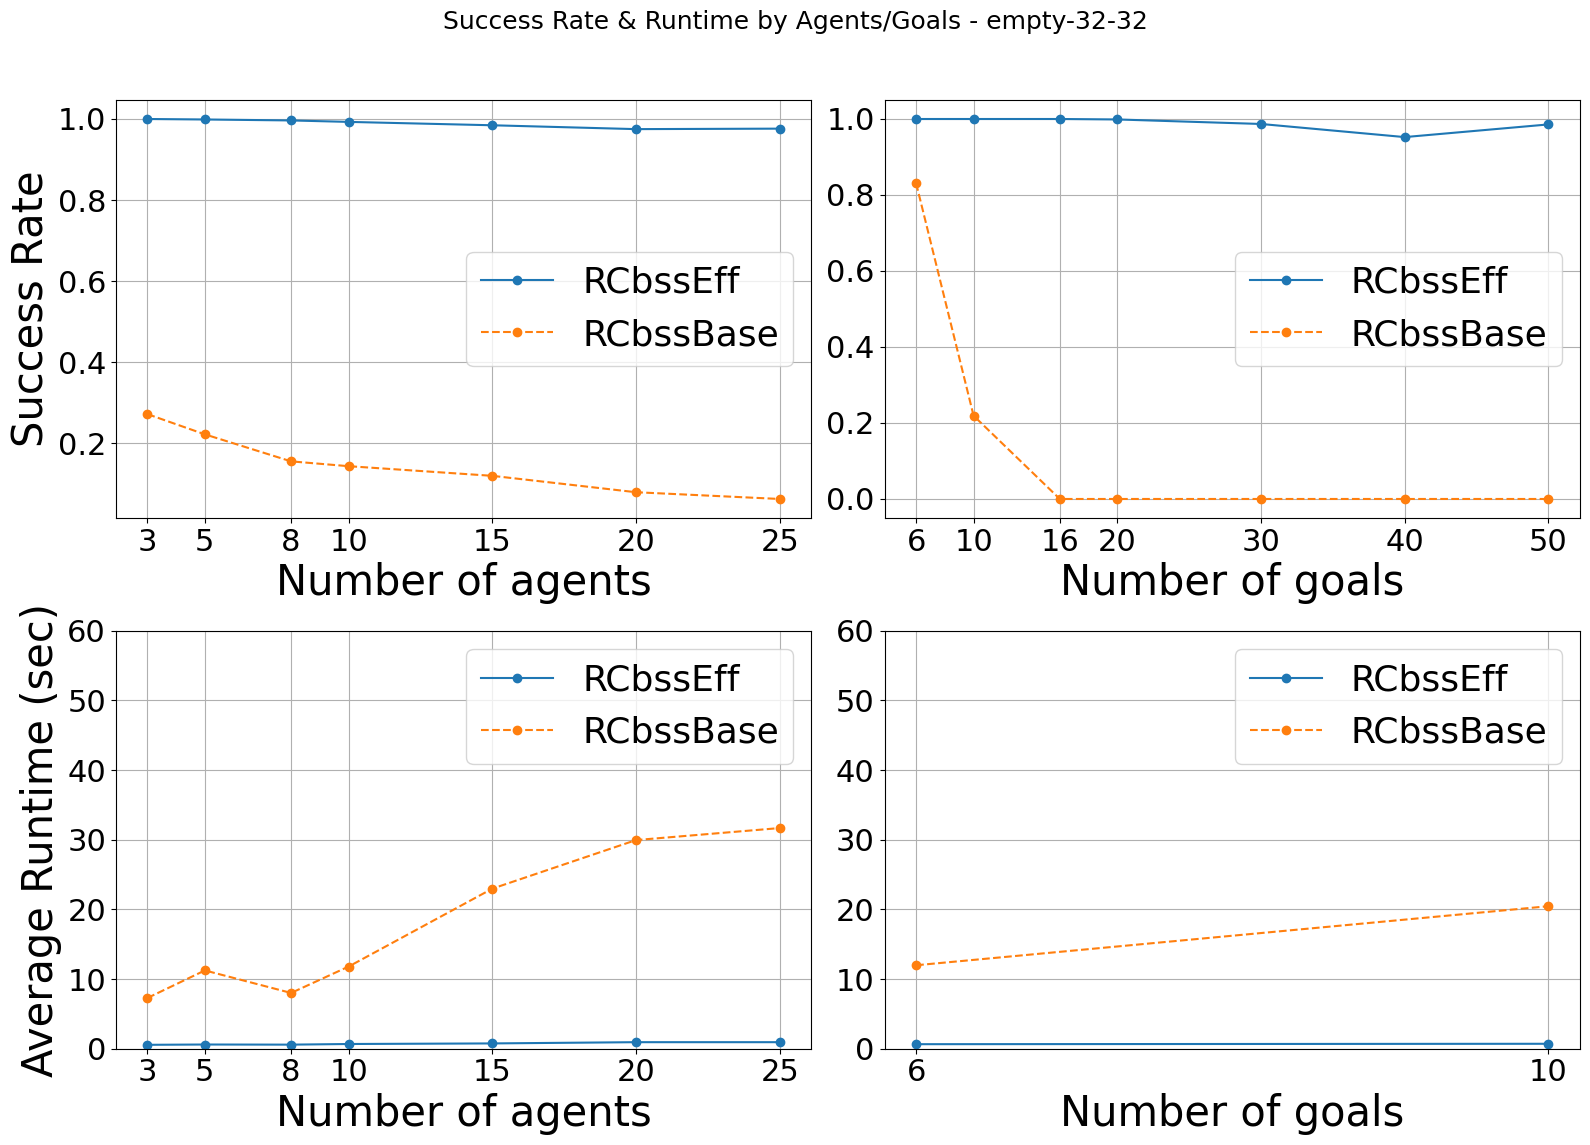

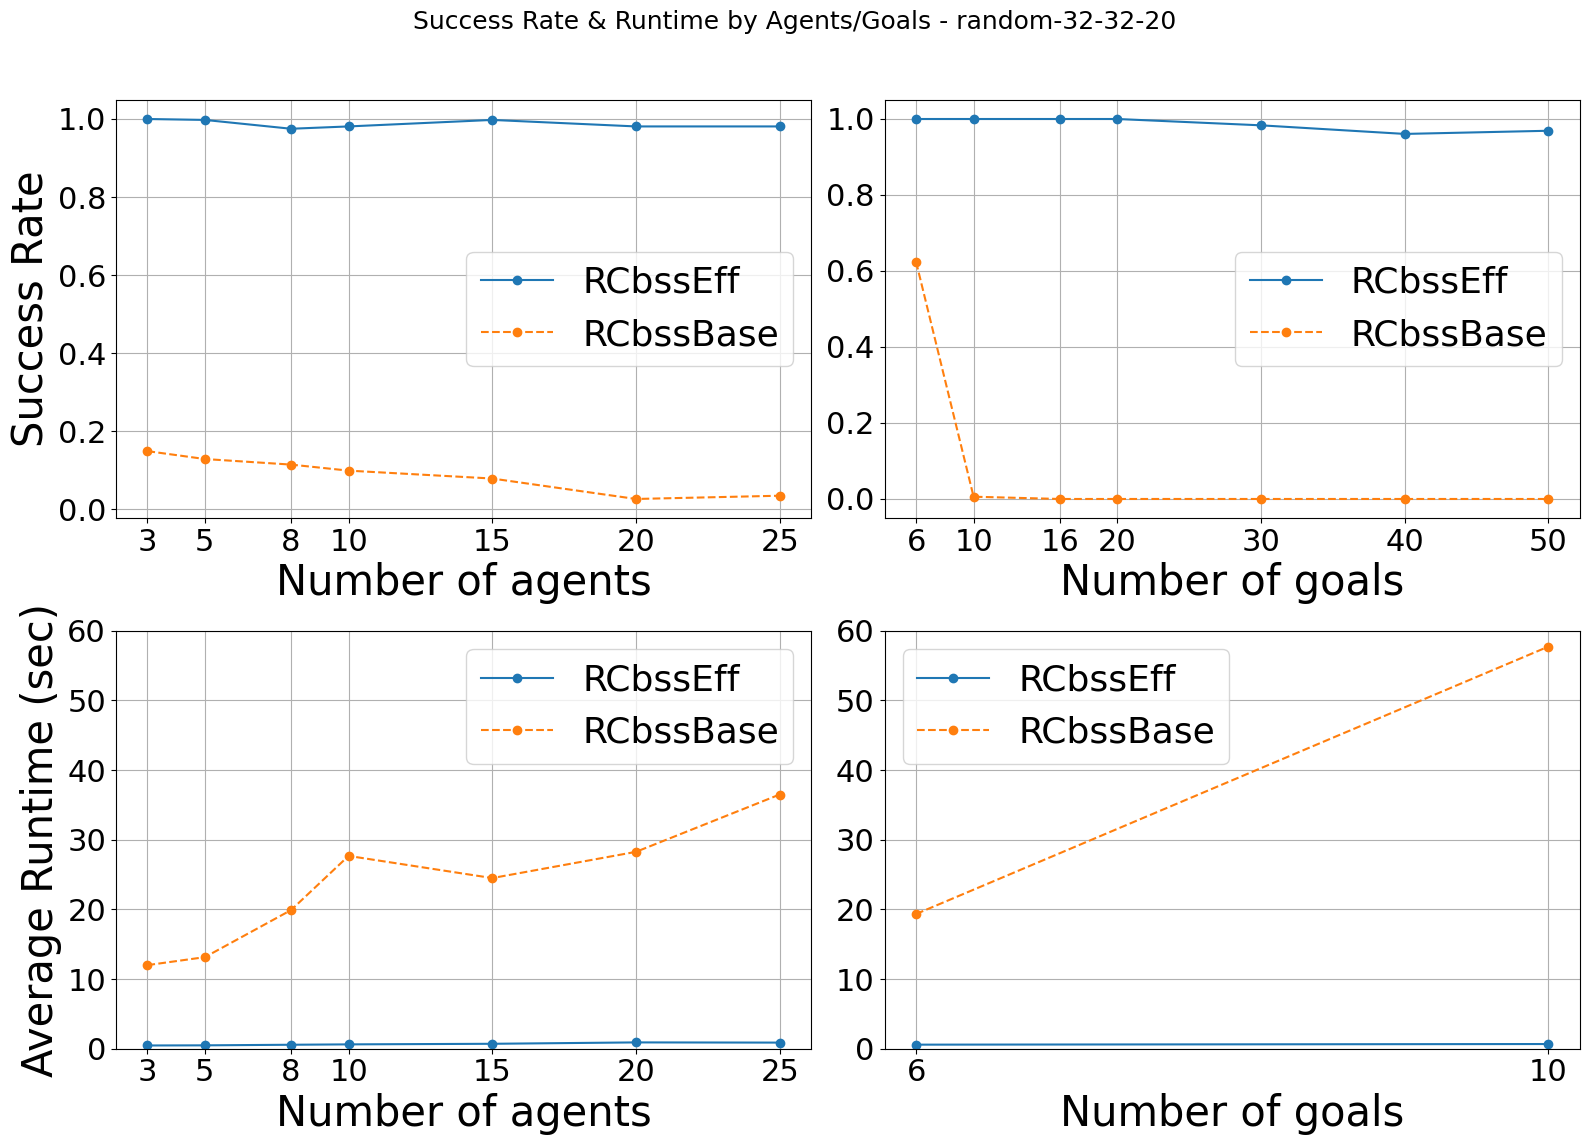

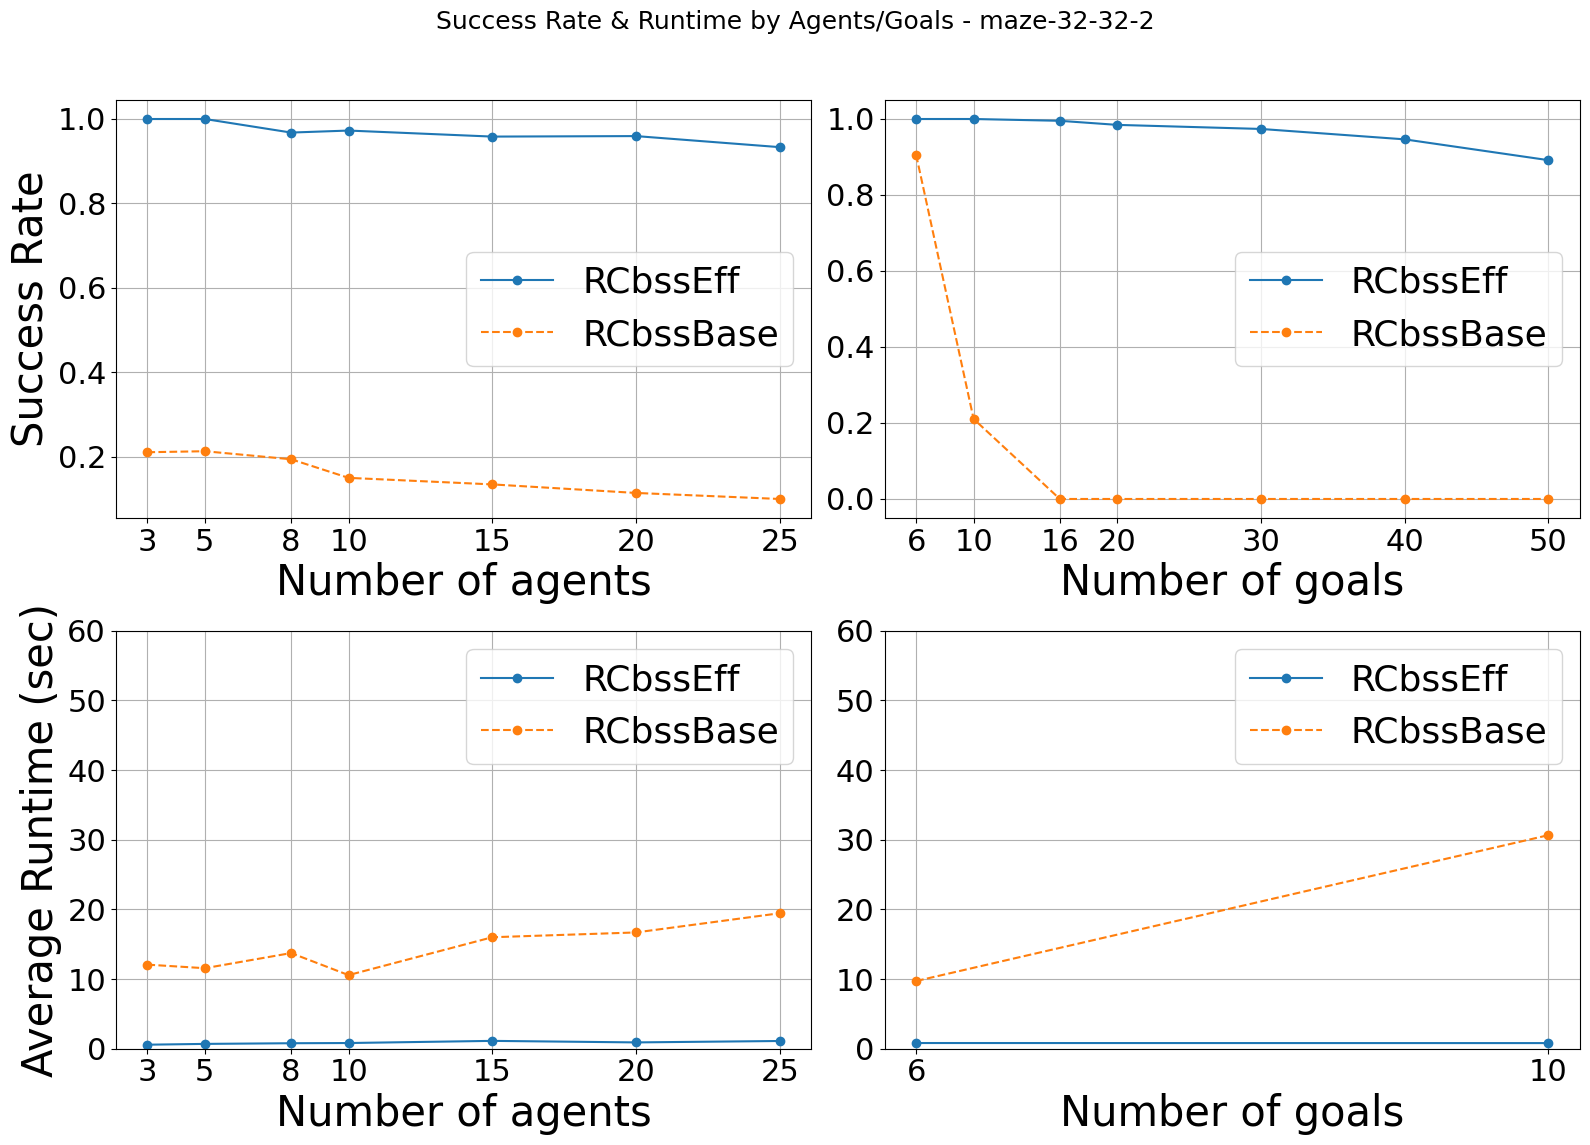

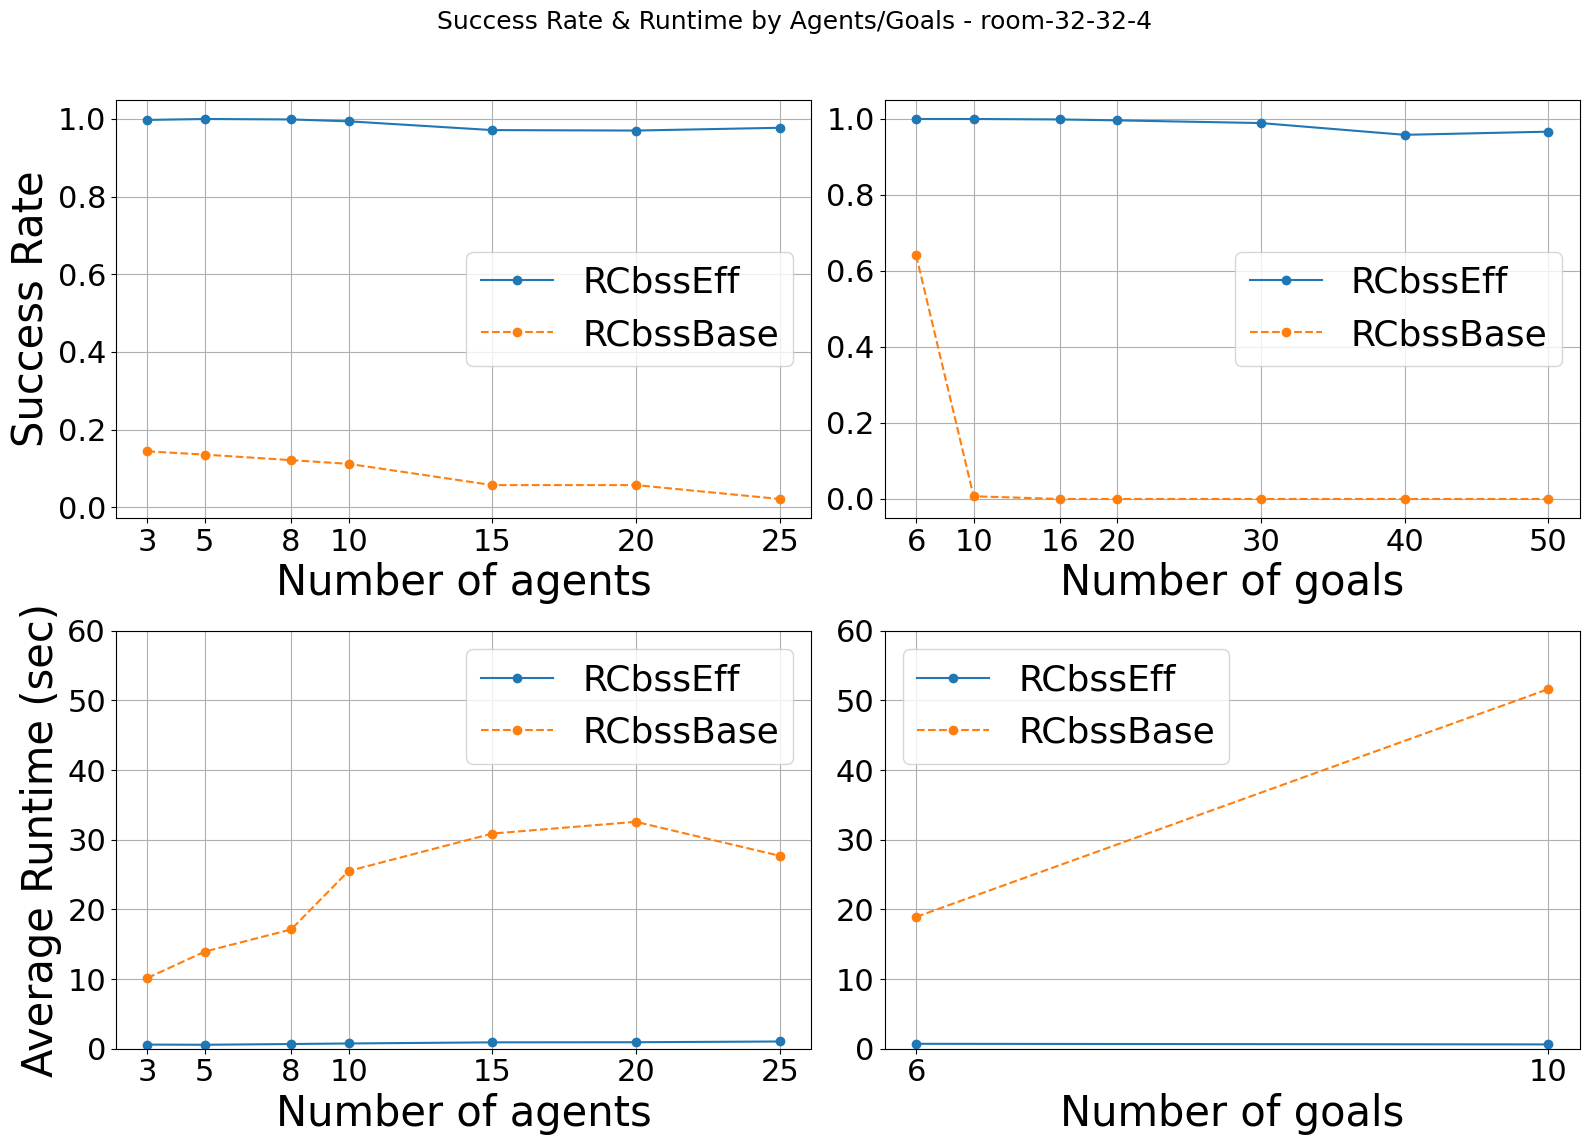

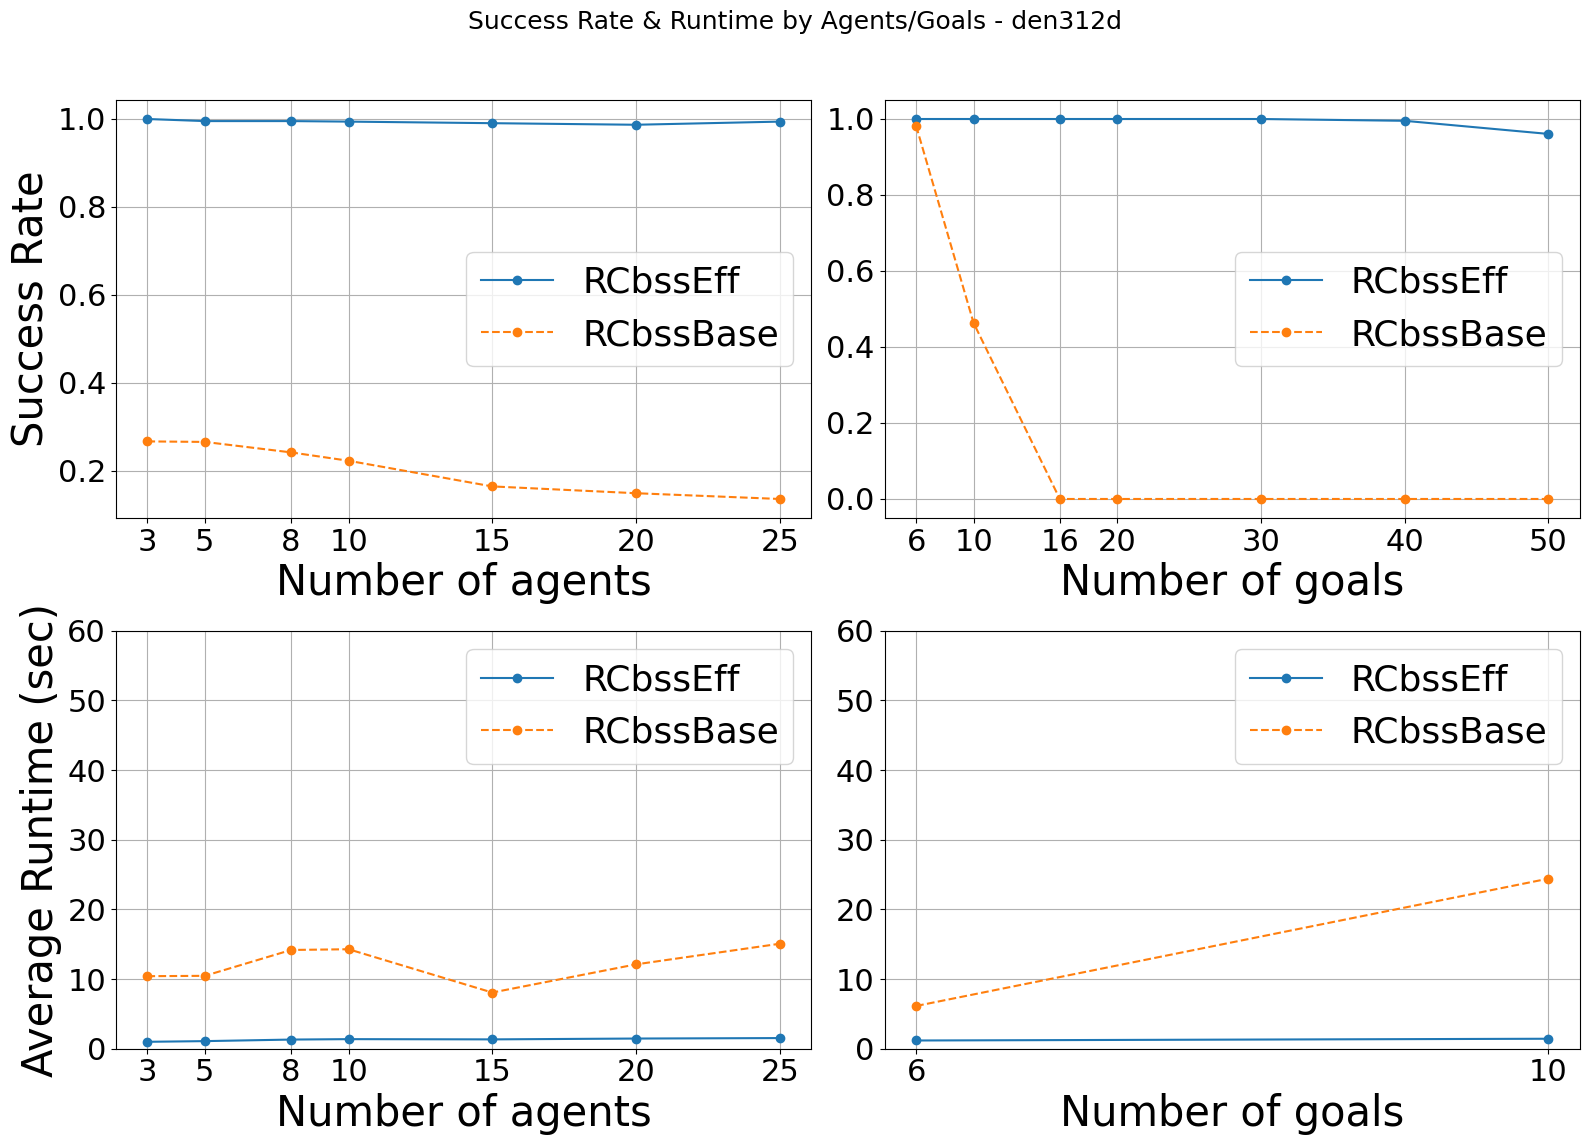

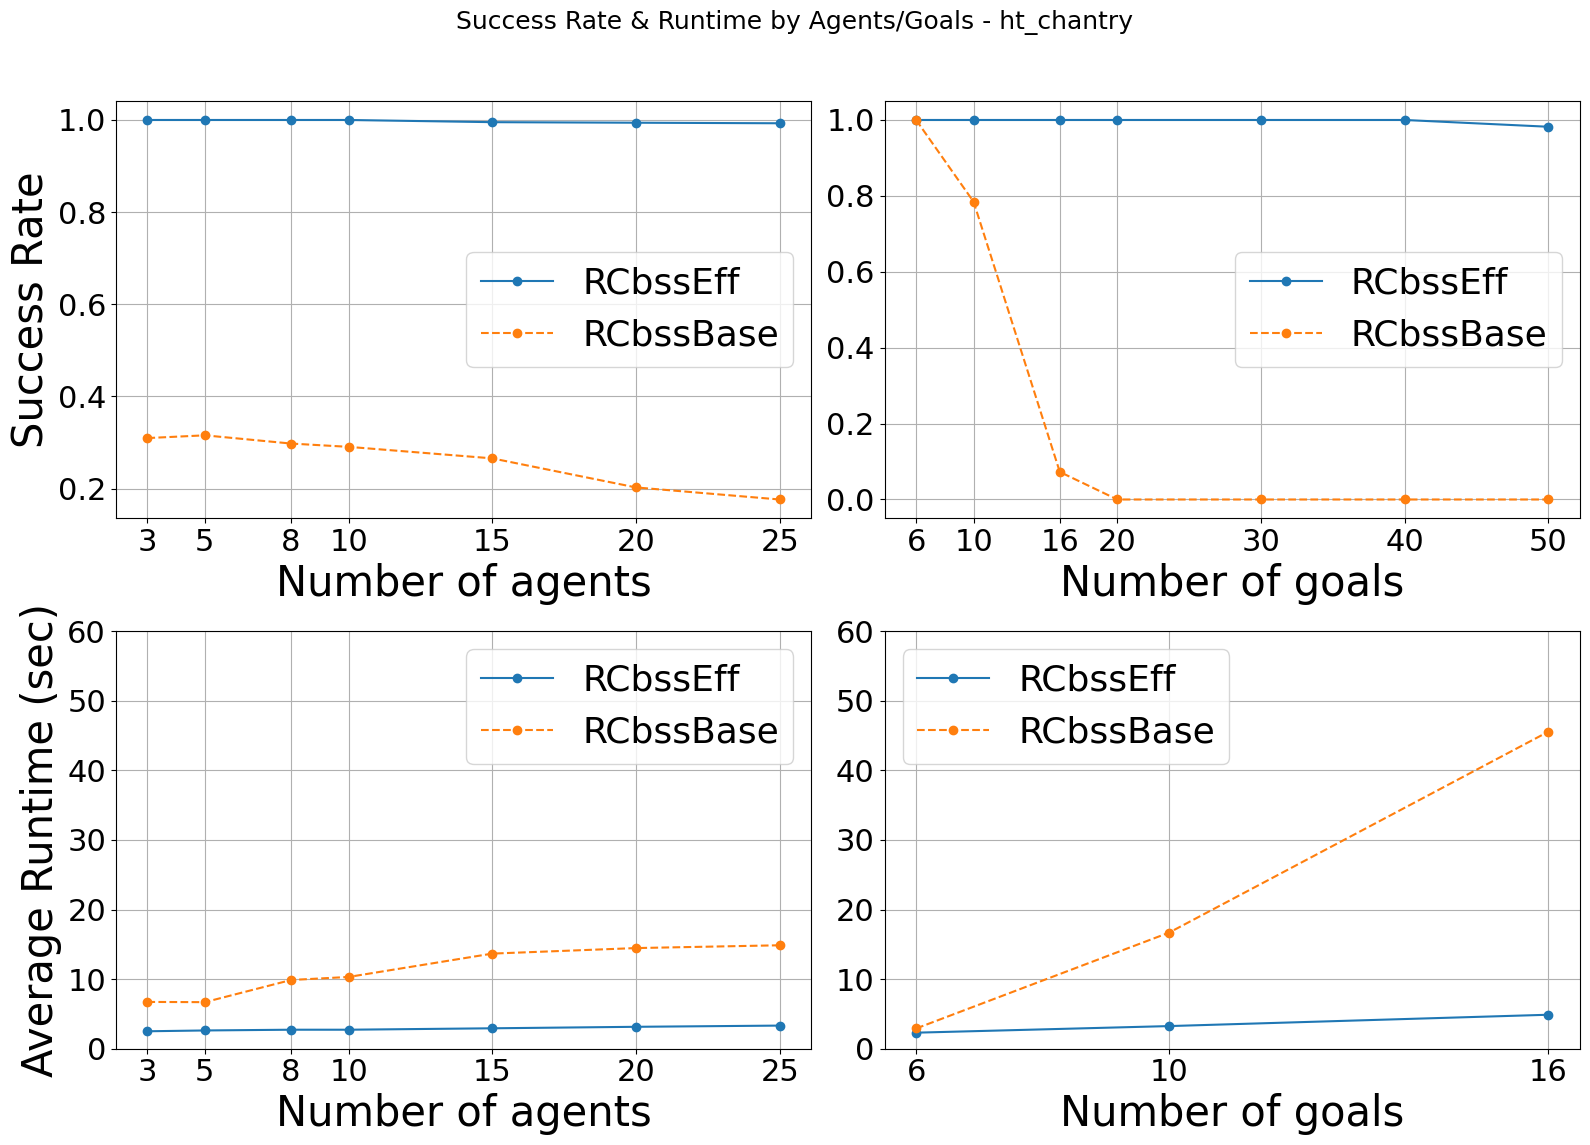

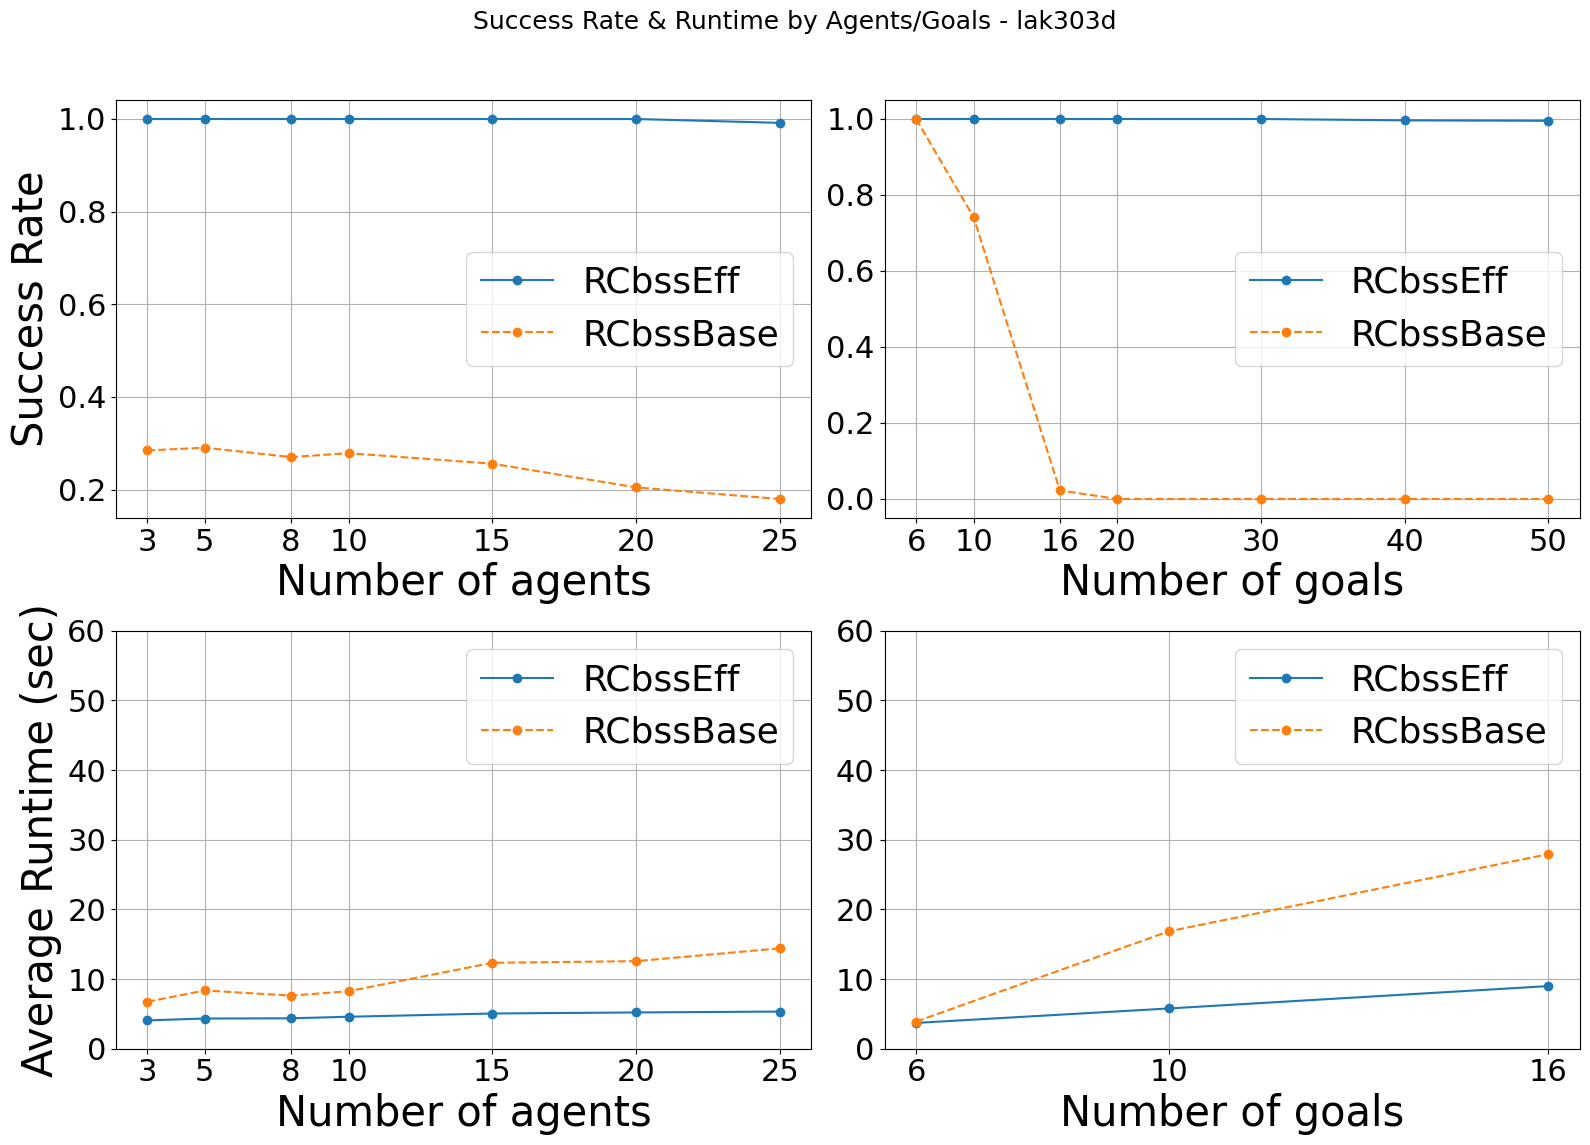

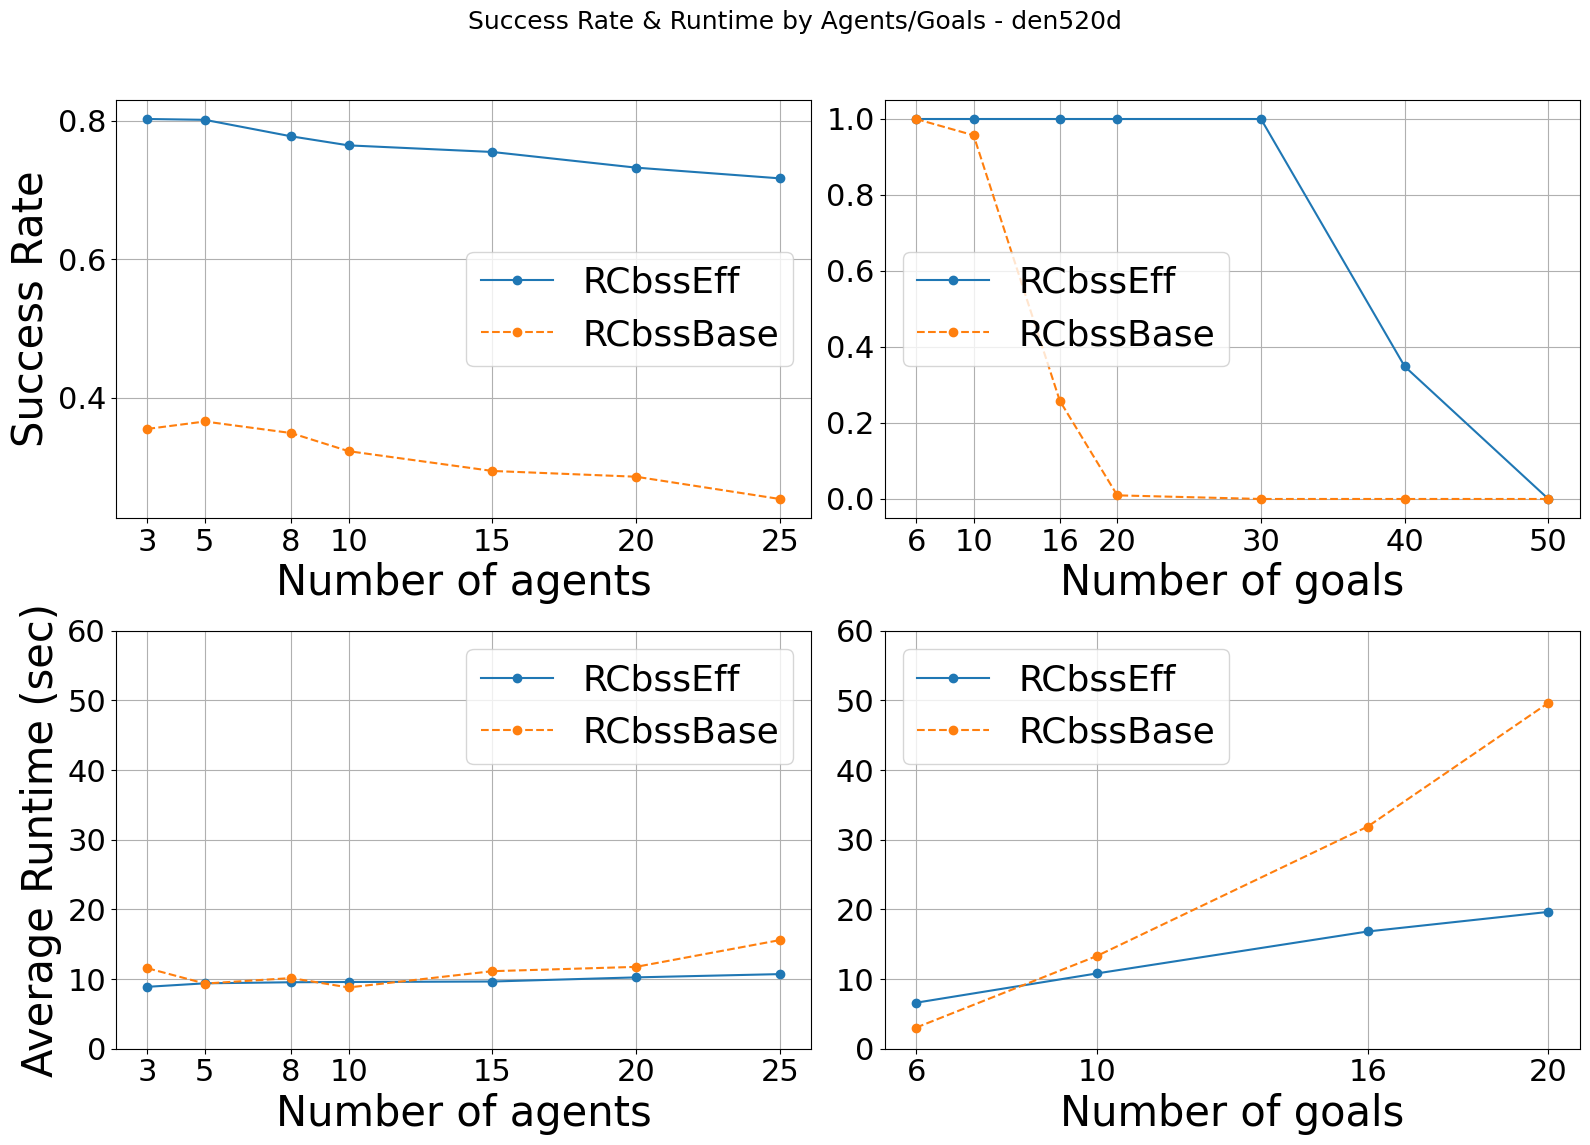

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data():
    file_path = '/content/RCbssEffVsRCbssBase_Results.csv'
    df = pd.read_csv(file_path)
    return df

def get_success_rate_data(df, x_axis):
    total_counts = df.groupby(['Map', x_axis, 'Algorithm']).size().reset_index(name='Total Count')
    valid_counts = df.dropna(how='any').groupby(['Map', x_axis, 'Algorithm']).size().reset_index(name='Valid Count')
    merged = pd.merge(total_counts, valid_counts, on=['Map', x_axis, 'Algorithm'], how='left')
    merged['Valid Count'] = merged['Valid Count'].fillna(0)
    merged['Success Rate'] = merged['Valid Count'] / merged['Total Count']
    return merged

def get_runtime_data(df, x_axis):
    id_fields = ['Map', 'Number of agents', 'Number of goals', 'Delay prob', 'Safe prob', 'Instance']
    df_clean = df.dropna(how='any')
    df_filtered = df_clean[id_fields + ['Algorithm', 'Runtime']]
    pivot_df = df_filtered.pivot_table(index=id_fields, columns='Algorithm', values='Runtime')
    both_success = pivot_df.dropna().reset_index()
    return both_success, pivot_df.columns.tolist()

def plot_all_for_each_map():
    df = prepare_data()

    for map_name in df['Map'].unique():
        fig, axs = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'Success Rate & Runtime by Agents/Goals - {map_name}', fontsize=18)

        # Success Rate vs Number of agents
        sr_agents = get_success_rate_data(df, 'Number of agents')
        map_sr_agents = sr_agents[sr_agents['Map'] == map_name]
        ax = axs[0, 0]
        for algo in map_sr_agents['Algorithm'].unique()[::-1]:
            algo_df = map_sr_agents[map_sr_agents['Algorithm'] == algo]
            style = '--' if algo.lower() == 'rcbssbase' else '-'
            ax.plot(algo_df['Number of agents'], algo_df['Success Rate'], marker='o', linestyle=style, label=algo)
        # ax.set_title('Success Rate as a Function of the Number of Agents', fontsize=20)
        ax.set_xlabel('Number of agents', fontsize=30)
        ax.set_ylabel('Success Rate', fontsize=30)
        ax.set_xticks(sorted(map_sr_agents['Number of agents'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=26)
        ax.grid(True)

        # Success Rate vs Number of goals
        sr_goals = get_success_rate_data(df, 'Number of goals')
        map_sr_goals = sr_goals[sr_goals['Map'] == map_name]
        ax = axs[0, 1]
        for algo in map_sr_goals['Algorithm'].unique()[::-1]:
            algo_df = map_sr_goals[map_sr_goals['Algorithm'] == algo]
            style = '--' if algo.lower() == 'rcbssbase' else '-'
            ax.plot(algo_df['Number of goals'], algo_df['Success Rate'], marker='o', linestyle=style, label=algo)
        # ax.set_title('Success Rate as a Function of the Number of Goals', fontsize=20)
        ax.set_xlabel('Number of goals', fontsize=30)
        # ax.set_ylabel('Success Rate', fontsize=24)
        ax.set_xticks(sorted(map_sr_goals['Number of goals'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=26)
        ax.grid(True)

        # Runtime vs Number of agents
        rt_agents, algos = get_runtime_data(df, 'Number of agents')
        map_rt_agents = rt_agents[rt_agents['Map'] == map_name]
        ax = axs[1, 0]
        for algo in algos[::-1]:
            avg_rt = map_rt_agents.groupby('Number of agents')[algo].mean()
            style = '--' if algo.lower() == 'rcbssbase' else '-'
            ax.plot(avg_rt.index, avg_rt.values, marker='o', linestyle=style, label=algo)
        # ax.set_title('Runtime as a Function of the Number of Agents', fontsize=20)
        ax.set_xlabel('Number of agents', fontsize=30)
        ax.set_ylabel('Average Runtime (sec)', fontsize=30)
        ax.set_ylim(0, 60)
        ax.set_yticks(range(0, 61, 10))
        ax.set_xticks(sorted(map_rt_agents['Number of agents'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=26)
        ax.grid(True)

        # Runtime vs Number of goals
        rt_goals, algos = get_runtime_data(df, 'Number of goals')
        map_rt_goals = rt_goals[rt_goals['Map'] == map_name]
        ax = axs[1, 1]
        for algo in algos[::-1]:
            avg_rt = map_rt_goals.groupby('Number of goals')[algo].mean()
            style = '--' if algo.lower() == 'rcbssbase' else '-'
            ax.plot(avg_rt.index, avg_rt.values, marker='o', linestyle=style, label=algo)
        # ax.set_title('Runtime as a Function of the Number of Goals', fontsize=20)
        ax.set_xlabel('Number of goals', fontsize=30)
        # ax.set_ylabel('Average Runtime (sec)', fontsize=24)
        ax.set_ylim(0, 60)
        ax.set_yticks(range(0, 61, 10))
        ax.set_xticks(sorted(map_rt_goals['Number of goals'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=22)
        ax.legend(fontsize=26)
        ax.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Execute the function
plot_all_for_each_map()


In [14]:
import pandas as pd
from scipy.stats import ttest_ind

def prepare_data():
    file_path = '/content/RCbssEffVsRCbssBase_Results.csv'
    df = pd.read_csv(file_path)
    return df

def perform_significance_tests(df):
    our_alg = 'RCbssEff'
    baselines = [algo for algo in df['Algorithm'].unique() if algo != our_alg]
    alpha = 0.05
    df['Success'] = df.notna().all(axis=1).astype(int)  # 1=success,0=failure

    id_fields = ['Map', 'Number of agents', 'Number of goals', 'Delay prob', 'Safe prob', 'Instance']
    df_clean = df.dropna(subset=['Runtime'])
    df_runtime = df_clean[id_fields + ['Algorithm', 'Runtime']]
    pivot_rt = df_runtime.pivot_table(index=id_fields, columns='Algorithm', values='Runtime').dropna().reset_index()

    print("=== T-tests for Success Rate & Runtime ===")
    for map_name in df['Map'].unique():
        print(f"\n==== Map: {map_name} ====")
        for x_axis in ['Number of agents', 'Number of goals']:
            for baseline in baselines:
                # Success Rate
                our_succ = df[(df['Map'] == map_name) & (df['Algorithm'] == our_alg)]['Success']
                base_succ = df[(df['Map'] == map_name) & (df['Algorithm'] == baseline)]['Success']
                if len(our_succ) > 1 and len(base_succ) > 1:
                    t_stat, p_value = ttest_ind(our_succ, base_succ, equal_var=False)
                    print(f"\nSuccess Rate vs {x_axis}: {our_alg} vs {baseline}")
                    print(f"  Mean {our_alg}: {our_succ.mean():.2f} | Mean {baseline}: {base_succ.mean():.2f}")
                    print(f"  T-test: statistic={t_stat:.3f}, p-value={p_value:.4f} {'*SIG*' if p_value < alpha else ''}")
                else:
                    print(f"\nSuccess Rate vs {x_axis}: Not enough data for {baseline}")

                # Runtime
                our_rt = pivot_rt[pivot_rt['Map'] == map_name][our_alg]
                base_rt = pivot_rt[pivot_rt['Map'] == map_name][baseline]
                if len(our_rt) > 1 and len(base_rt) > 1:
                    t_stat, p_value = ttest_ind(our_rt, base_rt, equal_var=False)
                    print(f"\nRuntime vs {x_axis}: {our_alg} vs {baseline}")
                    print(f"  Mean {our_alg}: {our_rt.mean():.2f} | Mean {baseline}: {base_rt.mean():.2f}")
                    print(f"  T-test: statistic={t_stat:.3f}, p-value={p_value:.4f} {'*SIG*' if p_value < alpha else ''}")
                else:
                    print(f"\nRuntime vs {x_axis}: Not enough data for {baseline}")

# Run
df = prepare_data()
perform_significance_tests(df)


=== T-tests for Success Rate & Runtime ===

==== Map: empty-32-32 ====

Success Rate vs Number of agents: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.99 | Mean RCbssBase: 0.15
  T-test: statistic=173.028, p-value=0.0000 *SIG*

Runtime vs Number of agents: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.66 | Mean RCbssBase: 13.75
  T-test: statistic=-25.959, p-value=0.0000 *SIG*

Success Rate vs Number of goals: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.99 | Mean RCbssBase: 0.15
  T-test: statistic=173.028, p-value=0.0000 *SIG*

Runtime vs Number of goals: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.66 | Mean RCbssBase: 13.75
  T-test: statistic=-25.959, p-value=0.0000 *SIG*

==== Map: random-32-32-20 ====

Success Rate vs Number of agents: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.99 | Mean RCbssBase: 0.09
  T-test: statistic=224.323, p-value=0.0000 *SIG*

Runtime vs Number of agents: RCbssEff vs RCbssBase
  Mean RCbssEff: 0.58 | Mean RCbssBase: 19.71
  T-test: statistic=-28.067, p-value=0.0000 *SIG*

# Ablation Study: Cases with ≥1 replanning call (where all algorithms succeeded)

In [15]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
file_path = '/content/RCbssEffAblationStudy_Result.csv'
df = pd.read_csv(file_path)

# Filter only rows with Planner calls (no other filtering)
df_filtered = df[
    (~df['Planner calls'].isna())
].copy()

# Convert Planner calls to int
df_filtered['Planner calls'] = df_filtered['Planner calls'].astype(int)

# Identify each unique case based on the identifiers
id_cols = ['Map', 'Safe prob', 'Delay prob', 'Number of agents', 'Number of goals', 'Instance']
algorithms = df_filtered['Algorithm'].unique()

# Find cases where ALL algorithms succeeded
instances_with_all_algos = (
    df_filtered
    .groupby(id_cols)['Algorithm']
    .nunique()
    .reset_index()
)

instances_with_all_algos = instances_with_all_algos[
    instances_with_all_algos['Algorithm'] == len(algorithms)
]

# Merge back to get only the relevant rows
df_filtered_all = df_filtered.merge(
    instances_with_all_algos[id_cols],
    on=id_cols,
    how='inner'
)

# Take only rows where Planner calls > 1
df_more_than_one = df_filtered_all[df_filtered_all['Planner calls'] > 1]

# Optional: show pivot table (just counts)
summary = (
    df_more_than_one
    .groupby(['Map', 'Algorithm'])
    .size()
    .reset_index(name='Cases with >1 Planner Call')
)

pivot_table = summary.pivot(
    index='Map',
    columns='Algorithm',
    values='Cases with >1 Planner Call'
).fillna(0).astype(int)

print("Pivot table (counts of cases):\n")
print(pivot_table)

Pivot table (counts of cases):

Algorithm        IDP  IRC  RCbssEff
Map                                
den312d            1    1         1
den520d            0    1         1
empty-32-32       29   27        10
ht_chantry         0    8         0
lak303d            6    0         1
maze-32-32-2      27    3        12
random-32-32-20    6    6         3
room-32-32-4       9    3         3


In [16]:
# T‑tests on cases with ≥1 replanning call (RCbssEff vs ablation tests, where all algorithms succeeded)
print(f"T-tests comparing {our_alg} with each baseline (on raw Planner calls data):")

maps = df_more_than_one['Map'].unique()
baselines = [algo for algo in algorithms if algo != our_alg]

for map_name in maps:
    print(f"\n--- Map: {map_name} ---")
    our_data = df_more_than_one[
        (df_more_than_one['Map'] == map_name) &
        (df_more_than_one['Algorithm'] == our_alg)
    ]['Planner calls']

    for baseline in baselines:
        baseline_data = df_more_than_one[
            (df_more_than_one['Map'] == map_name) &
            (df_more_than_one['Algorithm'] == baseline)
        ]['Planner calls']

        if len(our_data) > 1 and len(baseline_data) > 1:
            stat, p_value = ttest_ind(our_data, baseline_data, equal_var=False)
            print(f"\nComparison: {our_alg} vs {baseline}")
            print(f"  Mean {our_alg}: {our_data.mean():.2f} | Mean {baseline}: {baseline_data.mean():.2f}")
            print(f"  Std {our_alg}: {our_data.std():.2f} | Std {baseline}: {baseline_data.std():.2f}")
            print(f"  T-test result: statistic={stat:.3f}, p-value={p_value:.4f}")

            if p_value < 0.05:
                print("The difference is statistically significant (p < 0.05)")
            else:
                print("The difference is NOT statistically significant (p ≥ 0.05)")
        else:
            print(f"\nNot enough data to compare with {baseline} (need at least 2 samples per group)")


T-tests comparing RCbssEff with each baseline (on raw Planner calls data):

--- Map: empty-32-32 ---

Comparison: RCbssEff vs IDP
  Mean RCbssEff: 2.40 | Mean IDP: 5.55
  Std RCbssEff: 0.97 | Std IDP: 4.54
  T-test result: statistic=-3.515, p-value=0.0013
The difference is statistically significant (p < 0.05)

Comparison: RCbssEff vs IRC
  Mean RCbssEff: 2.40 | Mean IRC: 2.37
  Std RCbssEff: 0.97 | Std IRC: 1.01
  T-test result: statistic=0.082, p-value=0.9357
The difference is NOT statistically significant (p ≥ 0.05)

--- Map: random-32-32-20 ---

Comparison: RCbssEff vs IDP
  Mean RCbssEff: 2.00 | Mean IDP: 2.00
  Std RCbssEff: 0.00 | Std IDP: 0.00
  T-test result: statistic=nan, p-value=nan
The difference is NOT statistically significant (p ≥ 0.05)

Comparison: RCbssEff vs IRC
  Mean RCbssEff: 2.00 | Mean IRC: 6.50
  Std RCbssEff: 0.00 | Std IRC: 2.51
  T-test result: statistic=-4.392, p-value=0.0071
The difference is statistically significant (p < 0.05)

--- Map: maze-32-32-2 ---



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Ablation Study - Runtime, SOC, Planner Calls

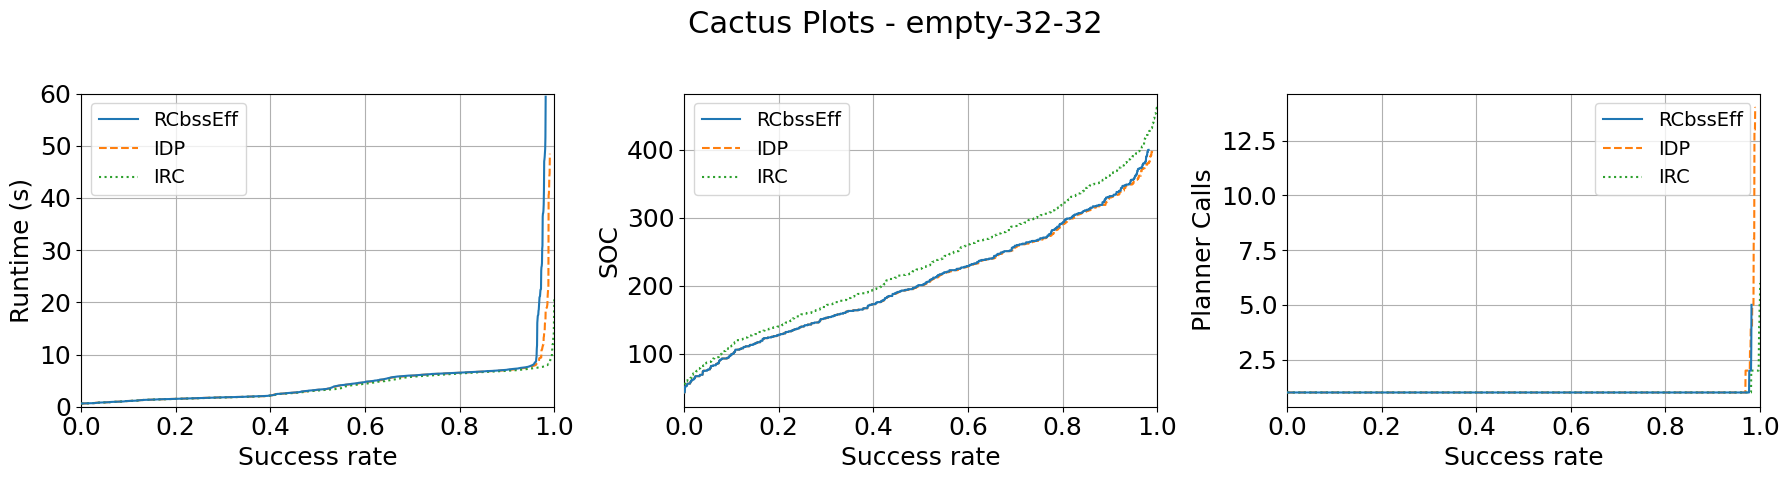

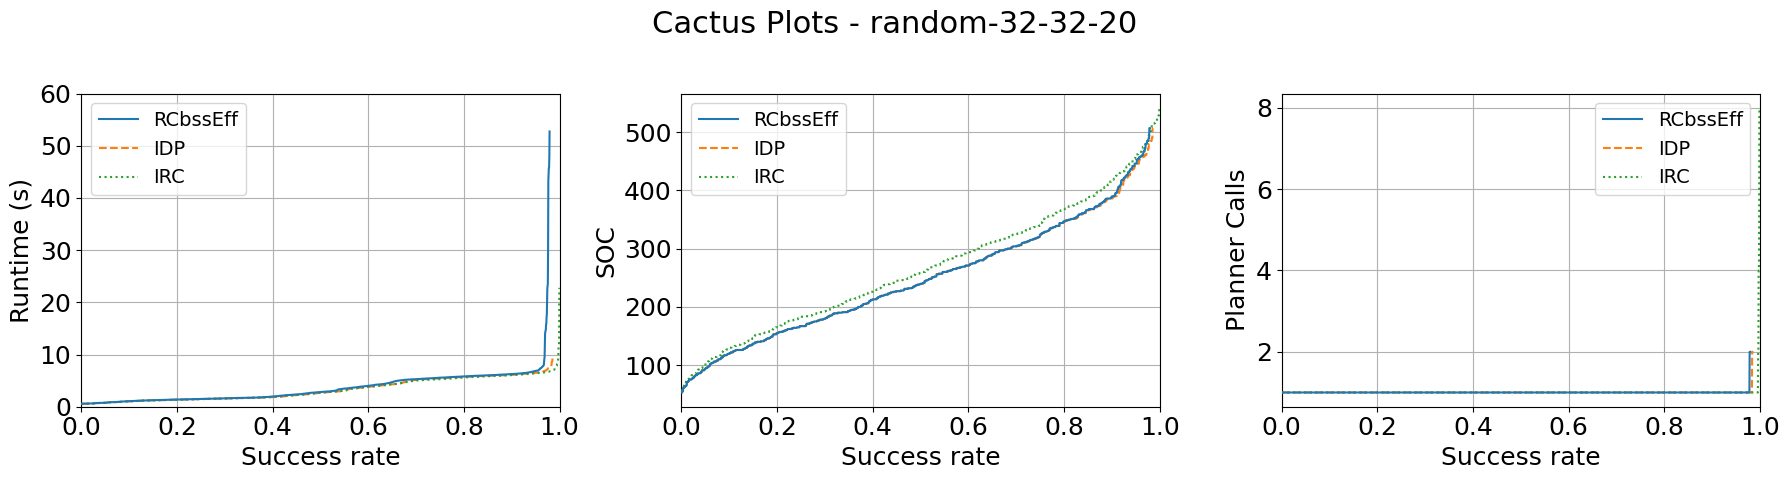

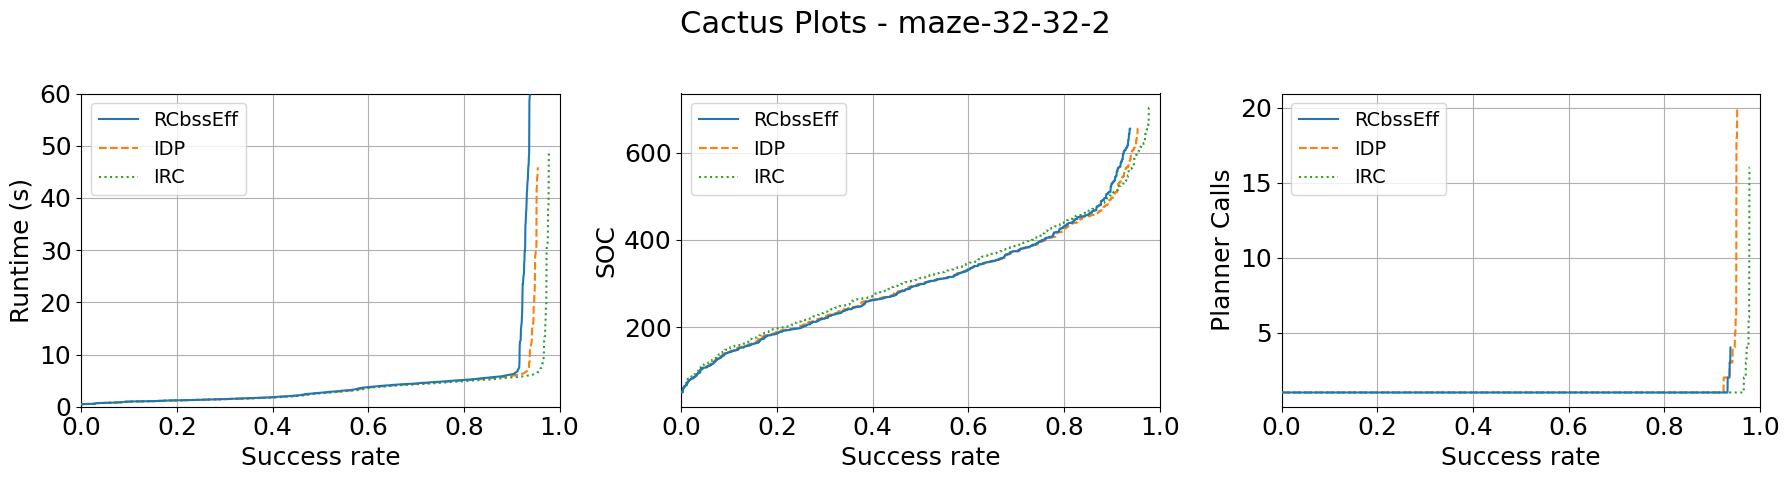

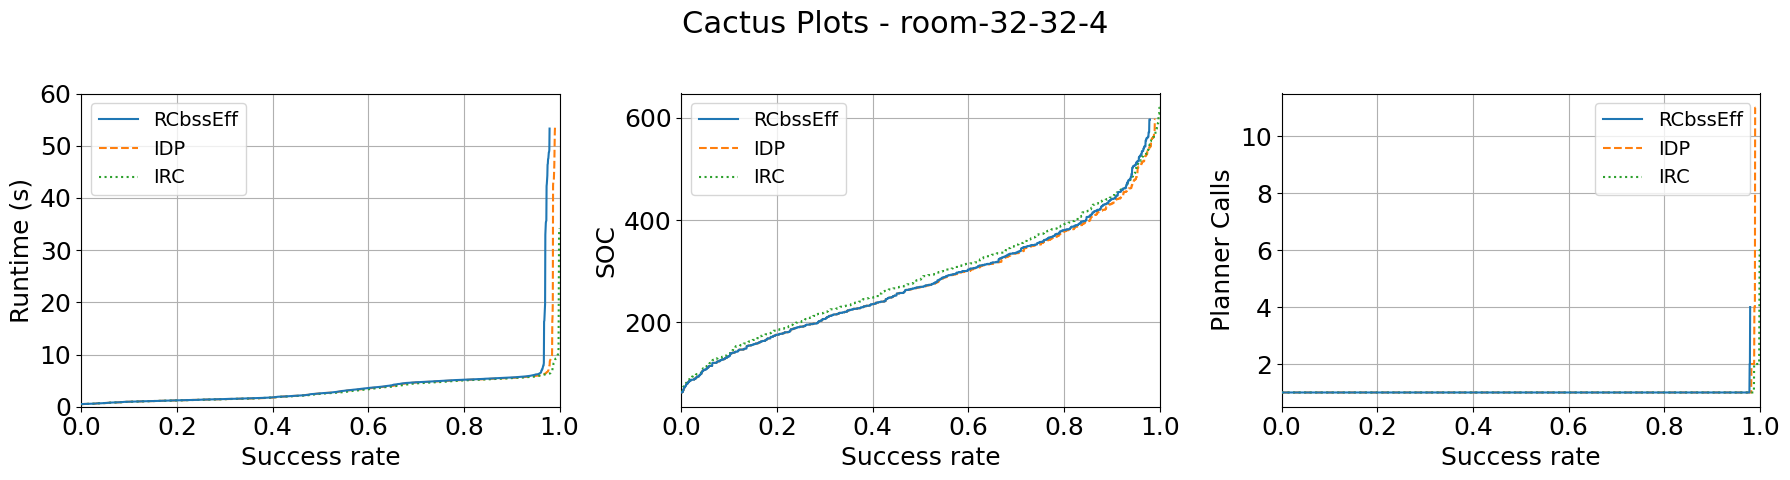

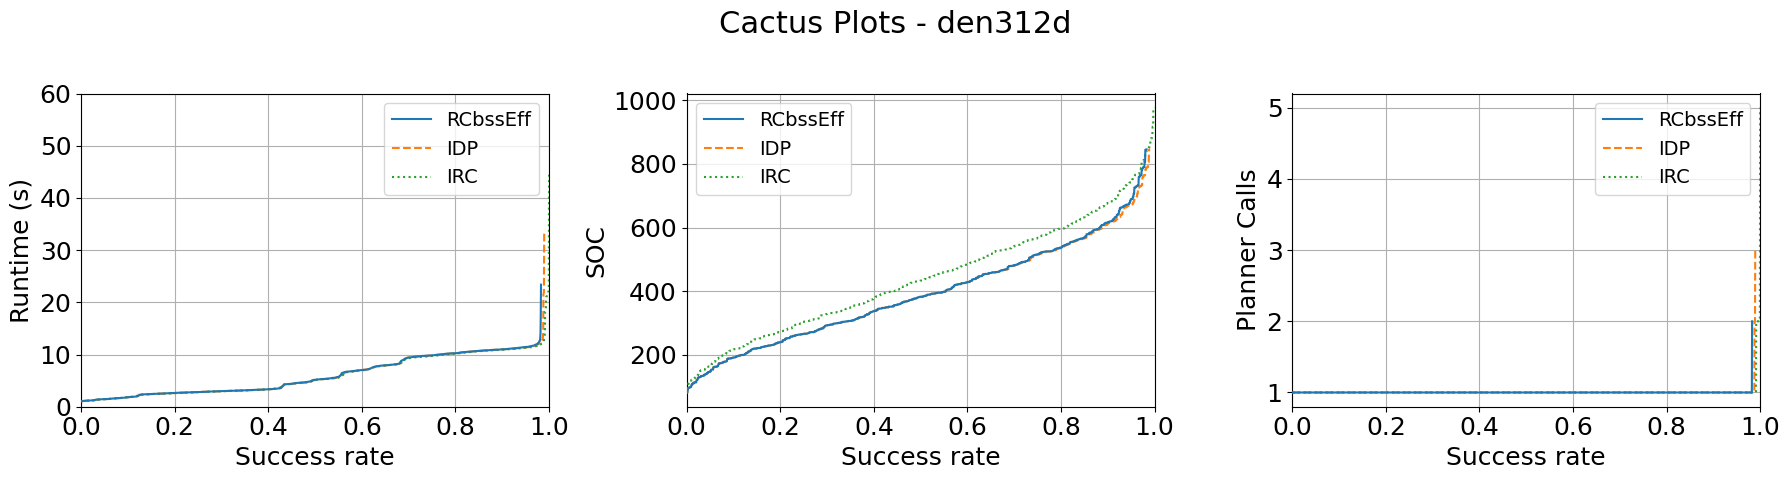

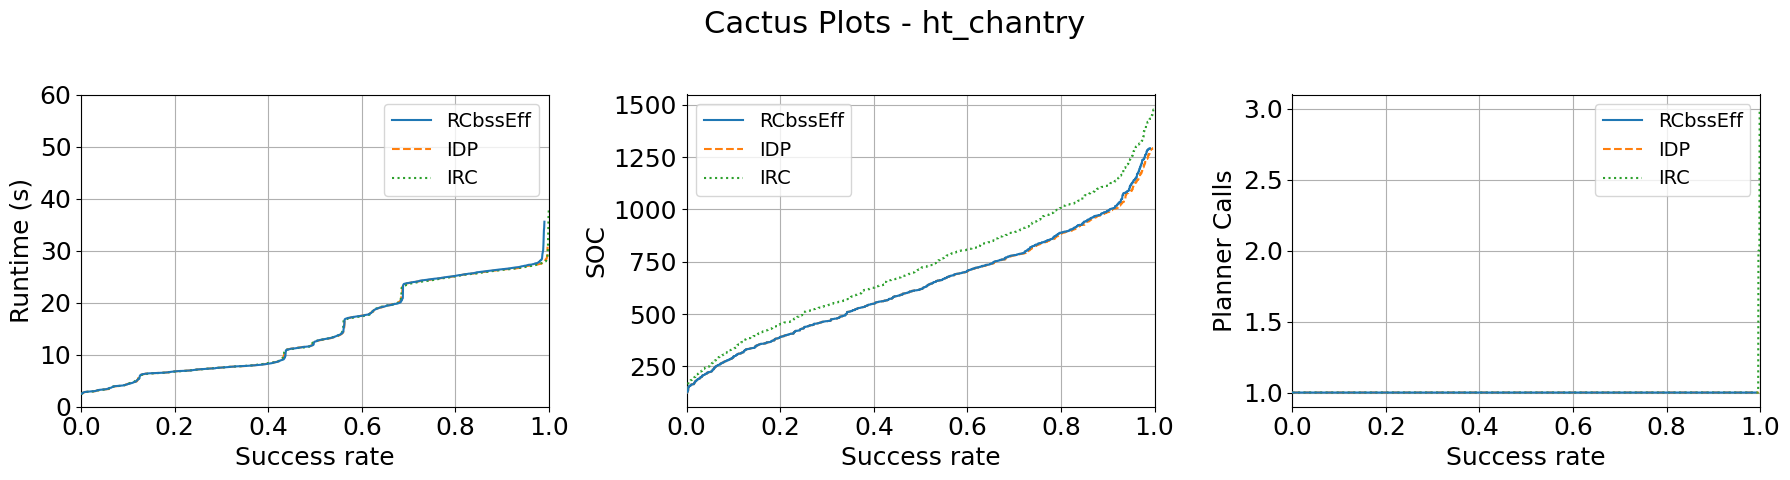

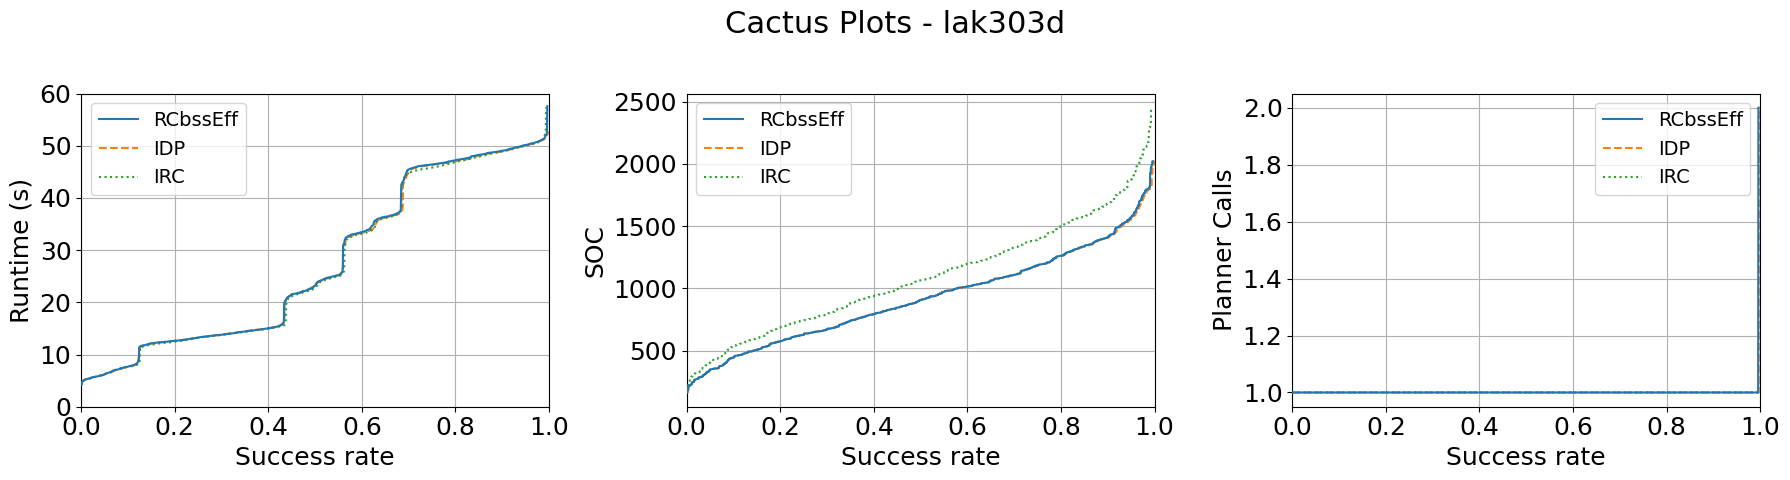

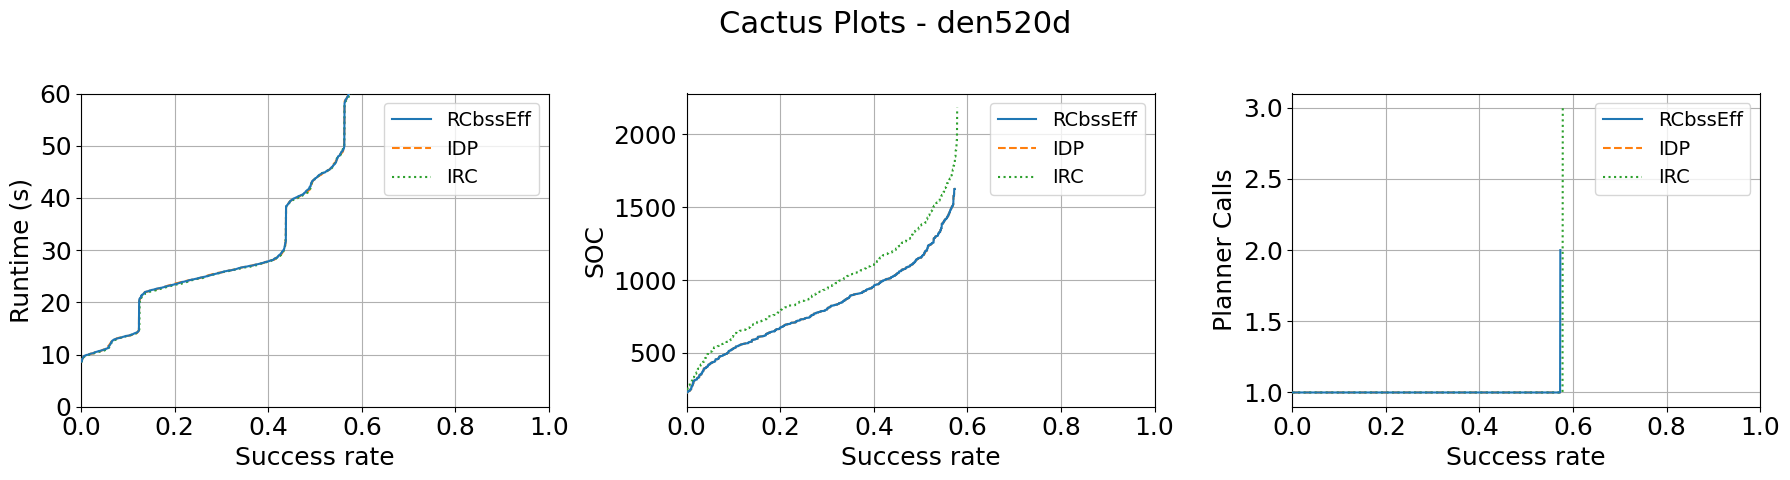

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the data
file_path = '/content/RCbssEffAblationStudy_Result.csv'
df = pd.read_csv(file_path)
df_success = df.dropna(how='any')

# Helper to generate X-axis for cactus plot
def get_success_x(total_count, count):
    return [i / total_count for i in range(1, count + 1)]

# Metrics to plot
metrics = [
    ("Runtime", "Runtime (s)", "Runtime as a Function of the Success Rate"),
    ("Sum Of Cost", "SOC", "SOC as a Function of the Success Rate"),
    ("Planner calls", "Planner Calls", "Planner Calls as a Function of the Success Rate")
]

linestyles = {
    'IDP': '--',
    'IRC': ':',
}

# Generate plots for each map
for map_name in df['Map'].unique():
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    fig.suptitle(f'Cactus Plots - {map_name}', fontsize=22)

    for i, (metric_col, y_label, title) in enumerate(metrics):
        ax = axs[i]

        for algo in df['Algorithm'].unique():
            total_rows = df[(df['Map'] == map_name) & (df['Algorithm'] == algo)]
            total_count = len(total_rows)

            success_rows = df_success[(df_success['Map'] == map_name) & (df_success['Algorithm'] == algo)]
            values = success_rows[metric_col].sort_values().reset_index(drop=True)
            x = get_success_x(total_count, len(values))

            ls = linestyles.get(algo, '-')

            if len(values) > 0:
                z_order = 10 if algo == our_alg else 5
                ax.plot(x, values, label=algo, linewidth=1.5, linestyle=ls, zorder=z_order)

        # ax.set_title(f'Cactus Plot: {title}', fontsize=14)
        ax.set_xlabel('Success rate', fontsize=18)
        ax.set_ylabel(y_label, fontsize=18)
        ax.set_xlim(0, 1)
        ax.set_xticks([round(i * 0.2, 2) for i in range(6)])
        if metric_col == "Runtime":
            ax.set_ylim(0, 60)
            ax.set_yticks(range(0, 61, 10))

        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.legend(fontsize=14)
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [18]:
# T‑tests on Sum of Cost for RCbssEff vs ablation test
import pandas as pd
from scipy.stats import ttest_ind

baselines = [algo for algo in algorithms if algo != our_alg]

df_filtered = df[df['Algorithm'].isin([our_alg] + baselines)]
maps = df_filtered['Map'].unique()
alpha = 0.05

print(f"T-tests comparing {our_alg} with baselines (on Sum Of Cost):")

for map_name in maps:
    print(f"\n--- Map: {map_name} ---")
    our_data = df_filtered[
        (df_filtered['Map'] == map_name) &
        (df_filtered['Algorithm'] == our_alg)
    ]['Sum Of Cost'].dropna()

    for baseline in baselines:
        baseline_data = df_filtered[
            (df_filtered['Map'] == map_name) &
            (df_filtered['Algorithm'] == baseline)
        ]['Sum Of Cost'].dropna()

        if len(our_data) > 1 and len(baseline_data) > 1:
            t_stat, p_value = ttest_ind(our_data, baseline_data, equal_var=False)

            print(f"\nComparison: {our_alg} vs {baseline}")
            print(f"  Mean {our_alg}: {our_data.mean():.2f} | Mean {baseline}: {baseline_data.mean():.2f}")
            print(f"  Std {our_alg}: {our_data.std():.2f} | Std {baseline}: {baseline_data.std():.2f}")
            print(f"  T-test result: statistic={t_stat:.3f}, p-value={p_value:.4f}")

            if p_value < alpha:
                print("The difference is statistically significant (p < 0.05)")
            else:
                print("The difference is NOT statistically significant (p ≥ 0.05)")
        else:
            print(f"\nNot enough data to compare with {baseline} (need at least 2 samples per group)")


T-tests comparing RCbssEff with baselines (on Sum Of Cost):

--- Map: empty-32-32 ---

Comparison: RCbssEff vs IDP
  Mean RCbssEff: 205.24 | Mean IDP: 205.76
  Std RCbssEff: 83.21 | Std IDP: 83.26
  T-test result: statistic=-0.194, p-value=0.8461
The difference is NOT statistically significant (p ≥ 0.05)

Comparison: RCbssEff vs IRC
  Mean RCbssEff: 205.24 | Mean IRC: 232.11
  Std RCbssEff: 83.21 | Std IRC: 94.18
  T-test result: statistic=-9.333, p-value=0.0000
The difference is statistically significant (p < 0.05)

--- Map: random-32-32-20 ---

Comparison: RCbssEff vs IDP
  Mean RCbssEff: 245.16 | Mean IDP: 246.12
  Std RCbssEff: 100.04 | Std IDP: 100.46
  T-test result: statistic=-0.294, p-value=0.7686
The difference is NOT statistically significant (p ≥ 0.05)

Comparison: RCbssEff vs IRC
  Mean RCbssEff: 245.16 | Mean IRC: 266.57
  Std RCbssEff: 100.04 | Std IRC: 108.68
  T-test result: statistic=-6.321, p-value=0.0000
The difference is statistically significant (p < 0.05)

--- Map